# Abgabe 3 Bigdata und Predictive Analytics 



**Teilnehmer :**
- Bisseck Bi Nyemeck Pierre Emmanuel .  
  - Matr: 20233002
- Mambe Thene Michelle Pradelle. 
  - Matr: 20236402
- Eric Martial Tindo Nkengne.
  - Matr:  20214743

# Einleitung

Im Rahmen dieser Analyse untersuchen wir einen Datensatz der Wohnungsbaugesellschaft (WBG) unter Anwendung von maschinellen Lernverfahren sowohl aus dem Bereich des überwachten als auch des unüberwachten Lernens. Der Datensatz umfasst eine Vielzahl von Variablen, von denen wir uns auf drei zentrale Aspekte konzentrieren nähmlich :


- Mietkosten(diese Spalte wollen wir im weiteren Verlauf  unserer Aufgabe anhand der Einstufung Mietkosten Spalte erstellen )
- Wohngebiet
- Generation der Mieter


- **Domain Problem**
Unser zentrales Domain-Problem lautet: was ist die Wahrscheinlichkeit, dass ein Mieter ein Mahnverfahren erhält und wovon hängt das ab ?

- Prädiktive Analyse

Die prädiktive Analyse umfasst Techniken wie Regression, Klassifikation und Clustering. Dabei orientieren wir uns an den folgenden Schritten:

    + Data Collection: Sammlung und Bereitstellung des WBG-Datensatzes.

    + Data Cleaning and Pre-processing: Bereinigung und Vorverarbeitung der Daten, um sicherzustellen, dass sie für die Analyse geeignet sind.

    + Exploratory Data Analysis (EDA): Erste Untersuchung der Daten, um grundlegende Muster und Zusammenhänge zu identifizieren.

    + Exploration of Intrinsic Data Structures: Untersuchung der zugrunde liegenden Datenstrukturen und ihrer Beziehungen.

    + Predictive and/or Inferential Analysis: Anwendung prädiktiver und/oder inferentieller Analysemethoden, um die Hypothesen zu überprüfen und Vorhersagen zu treffen.

    + Scrutinization of Results: Kritische Überprüfung der Ergebnisse auf ihre Validität und Aussagekraft.

    + Interpreting and Communicating Results: Interpretation und Kommunikation der Ergebnisse, um Handlungsempfehlungen abzuleiten.
    
    + Updating Domain Knowledge: Aktualisierung des Fachwissens basierend auf den gewonnenen Erkenntnissen.


- Hypothesen

Im Laufe unserer Aufgabe wollen wir uns mit den Folgenden Hypothesen auseinandersetzen:
Voici une version complétée des points fournis :

1. **Mietkosten wirken sich signifikant auf die Wahrscheinlichkeit eines Mahnverfahrens aus.**
   Wir nahmen hier an, dass höhere Mietkosten die finanzielle Belastung der Mieter erhöhen, was zu Zahlungsschwierigkeiten führen kann. Dadurch steigt die Wahrscheinlichkeit, dass ein Mieter in ein Mahnverfahren gerät, wenn er mit der Mietzahlung in Verzug gerät.

2. **Das Wohngebiet beeinflusst die Wahrscheinlichkeit, dass ein Mieter von einem Mahnverfahren betroffen ist.**
   Unsere Annahme an dieser Stelle war, dass Mieter je nach Wohngebieten unterschiedlichen wirtschaftlichen und sozialen Bedingungen ausgesetzt sind. In einkommensschwächeren Gebieten könnten Mieter eher Schwierigkeiten haben, ihre Miete pünktlich zu zahlen, was zu einer höheren Wahrscheinlichkeit von Mahnverfahren führt.

3. **Die Wahrscheinlichkeit eines Mahnverfahrens hängt von der Zugehörigkeit zu einem bestimmten Cluster (jüngere, mittlere oder ältere Mieter) ab.**
   Wir dachten uns hier, dass besonders jüngere Mieter oder ältere Mieter mehr von Mahnverfahren betroffen wären, weil jüngere Mieter möglicherweise weniger stabile Einkommen und weniger finanzielle Rücklagen haben, während ältere Mieter möglicherweise mit festen Renteneinkommen und eventuellen gesundheitlichen Ausgaben belastet sind. Diese Faktoren könnten die finanzielle Stabilität beeinflussen und die Wahrscheinlichkeit eines Mahnverfahrens erhöhen.

Diese strukturierte Herangehensweise wird uns dabei helfen, die zugrunde liegenden Faktoren und Muster zu identifizieren, die die Wahrscheinlichkeit eines Mahnverfahrens beeinflussen. Dadurch können gezielte Maßnahmen und Empfehlungen für die Wohnungsbaugesellschaft abgeleitet werden, um die finanzielle Belastung der Mieter zu reduzieren und Mahnverfahren zu minimieren.








Bibliotheken

In [276]:
import pandas as pd

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


Laden des Datensatzes

In [278]:
# Definieren Sie den Pfad zur Datei, indem Sie eine rohe Zeichenfolge verwenden
PFAD = r'C:\Users\49157\Downloads\wbg_datensatz\WBG_Datensatz.xlsx'

try:
    # Lesen Sie die Excel-Datei
    df = pd.read_excel(PFAD)
    pd.set_option('display.max_columns', None)
    # Zeigen Sie alle Spalten an
    pd.set_option('display.max_columns', None)
    
    # Zeigen Sie das DataFrame an
    print(df)
    
except PermissionError:
    print("PermissionError: Die Datei ist nicht zugänglich. Bitte überprüfen Sie die Dateiberechtigungen.")
except FileNotFoundError:
    print("FileNotFoundError: Die Datei wurde nicht gefunden. Bitte überprüfen Sie den Dateipfad.")
except Exception as e:
    print(f"Ein unerwarteter Fehler ist aufgetreten: {e}")


      Einheit  Haus  Wohnung    Wohngebiet         Geschoss  Wohnfläche  \
0           1     1        1  Hohenstücken      Erdgeschoss       65.83   
1           1     1        2  Hohenstücken      Erdgeschoss       66.23   
2           1     1        3  Hohenstücken  1. Obergeschoss       65.83   
3           1     1        4  Hohenstücken  1. Obergeschoss       93.10   
4           1     1        5  Hohenstücken  2. Obergeschoss       65.83   
...       ...   ...      ...           ...              ...         ...   
6419      354     1        3    Innenstadt  1. Obergeschoss       74.23   
6420      354     1        5    Innenstadt  1. Obergeschoss       61.84   
6421      354     1        6    Innenstadt  2. Obergeschoss       74.23   
6422      354     1        7    Innenstadt  2. Obergeschoss       50.35   
6423      354     1        8    Innenstadt  2. Obergeschoss       61.35   

      Raumanzahl Dusche Wanne Aufzug Balkon/Terasse  Einstufung Mietkosten  \
0              3   ne

Daten vorbereiten

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424 entries, 0 to 6423
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Einheit                 6424 non-null   int64         
 1   Haus                    6424 non-null   int64         
 2   Wohnung                 6424 non-null   int64         
 3   Wohngebiet              6424 non-null   object        
 4   Geschoss                6424 non-null   object        
 5   Wohnfläche              6424 non-null   float64       
 6   Raumanzahl              6424 non-null   int64         
 7   Dusche                  6424 non-null   object        
 8   Wanne                   6424 non-null   object        
 9   Aufzug                  6424 non-null   object        
 10  Balkon/Terasse          6424 non-null   object        
 11  Einstufung Mietkosten   6424 non-null   int64         
 12  Geschlecht              6424 non-null   object  

In [280]:
df.describe(include='all')

,Einheit,Haus,Wohnung,Wohngebiet,Geschoss,Wohnfläche,Raumanzahl,Dusche,Wanne,Aufzug,Balkon/Terasse,Einstufung Mietkosten,Geschlecht,Generation,Altereinstufung_Einzug,Wohndauer in Monaten,Mieteralter_Einzug,Einzug,Personenanzahl,Haustier,Mahnverfahren
count,6424.000000,6424.000000,6424.000000,6424,6424,6424.000000,6424.000000,6424,6424,6424,6424,6424.000000,6424,6424.0,6424.000000,6424.000000,6424.000000,6424,6424.000000,6424,6424
unique,NaN,NaN,NaN,4,8,NaN,NaN,2,2,2,2,NaN,2,9.0,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,Nord,Erdgeschoss,NaN,NaN,nein,ja,nein,ja,NaN,W,8.0,NaN,NaN,NaN,NaN,NaN,nein,nein
freq,NaN,NaN,NaN,3452,1491,NaN,NaN,4022,4175,5412,6256,NaN,3379,2138.0,NaN,NaN,NaN,NaN,NaN,5916,5668
mean,114.025996,2.693493,28.221357,NaN,NaN,58.472164,2.666407,NaN,NaN,NaN,NaN,3.033313,NaN,NaN,4.154888,174.924035,47.335149,2009-08-30 19:59:15.168119552,1.562889,NaN,NaN
min,1.000000,1.000000,1.000000,NaN,NaN,28.380000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,-4.000000,0.000000,1956-03-01 00:00:00,1.000000,NaN,NaN
25%,62.000000,1.000000,10.000000,NaN,NaN,49.680000,2.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,38.000000,31.000000,2004-11-01 00:00:00,1.000000,NaN,NaN
50%,108.000000,2.000000,21.000000,NaN,NaN,59.060000,3.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,4.000000,105.000000,45.000000,2015-07-01 00:00:00,1.000000,NaN,NaN
75%,155.000000,4.000000,35.000000,NaN,NaN,61.130000,3.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,6.000000,233.000000,62.000000,2021-02-01 00:00:00,2.000000,NaN,NaN
max,354.000000,11.000000,162.000000,NaN,NaN,165.480000,8.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,8.000000,817.000000,124.000000,2024-08-01 00:00:00,12.000000,NaN,NaN


In [281]:
df.dtypes

Einheit                            int64
Haus                               int64
Wohnung                            int64
Wohngebiet                        object
Geschoss                          object
Wohnfläche                       float64
Raumanzahl                         int64
Dusche                            object
Wanne                             object
Aufzug                            object
Balkon/Terasse                    object
Einstufung Mietkosten              int64
Geschlecht                        object
Generation                        object
Altereinstufung_Einzug             int64
Wohndauer in Monaten               int64
Mieteralter_Einzug                 int64
Einzug                    datetime64[ns]
Personenanzahl                     int64
Haustier                          object
Mahnverfahren                     object
dtype: object

Die Anweisung df.dtypes in Python, gibt die Datentypen jeder Spalte in unserem DataFrame zurück. Diese Informationen  sind nützlich, um zu verstehen, welche Arten von Daten in den einzelnen Spalten des DataFrame enthalten sind. Es hilft dabei, Datenoperationen entsprechend zu planen und sicherzustellen, dass die Daten in einem geeigneten Format vorliegen.

In [282]:
df.head(20)

,Einheit,Haus,Wohnung,Wohngebiet,Geschoss,Wohnfläche,Raumanzahl,Dusche,Wanne,Aufzug,Balkon/Terasse,Einstufung Mietkosten,Geschlecht,Generation,Altereinstufung_Einzug,Wohndauer in Monaten,Mieteralter_Einzug,Einzug,Personenanzahl,Haustier,Mahnverfahren
0,1,1,1,Hohenstücken,Erdgeschoss,65.83,3,nein,ja,nein,ja,3,M,8,3,544,37,1978-12-01,1,nein,nein
1,1,1,2,Hohenstücken,Erdgeschoss,66.23,3,nein,ja,nein,ja,3,W,7,2,544,26,1978-12-01,1,nein,nein
2,1,1,3,Hohenstücken,1. Obergeschoss,65.83,3,nein,ja,nein,ja,3,M,7,5,152,60,2011-07-01,2,nein,nein
3,1,1,4,Hohenstücken,1. Obergeschoss,93.10,5,nein,ja,nein,ja,5,M,7,5,128,60,2013-08-01,3,ja,nein
4,1,1,5,Hohenstücken,2. Obergeschoss,65.83,3,nein,ja,nein,ja,3,M,8,3,416,39,1989-08-01,1,nein,nein
5,1,1,6,Hohenstücken,2. Obergeschoss,93.10,5,nein,ja,nein,ja,4,W,7,4,251,42,2003-05-01,3,nein,nein
6,1,1,7,Hohenstücken,3. Obergeschoss,65.83,3,nein,ja,nein,ja,4,M,3,2,35,25,2021-05-01,1,nein,nein
7,1,1,8,Hohenstücken,3. Obergeschoss,93.10,5,nein,ja,nein,ja,4,M,6,4,214,45,2006-06-01,5,nein,nein
8,1,1,9,Hohenstücken,4. Obergeschoss,65.83,3,nein,ja,nein,ja,4,M,4,3,48,34,2020-04-01,3,nein,nein
9,1,1,10,Hohenstücken,4. Obergeschoss,93.10,5,nein,ja,nein,ja,4,W,5,2,205,29,2007-03-01,3,nein,nein


In [283]:
## NaN Werte prüfen
print(df.isnull().sum())




Einheit                   0
Haus                      0
Wohnung                   0
Wohngebiet                0
Geschoss                  0
Wohnfläche                0
Raumanzahl                0
Dusche                    0
Wanne                     0
Aufzug                    0
Balkon/Terasse            0
Einstufung Mietkosten     0
Geschlecht                0
Generation                0
Altereinstufung_Einzug    0
Wohndauer in Monaten      0
Mieteralter_Einzug        0
Einzug                    0
Personenanzahl            0
Haustier                  0
Mahnverfahren             0
dtype: int64


 Diese Anweisung ermöglicht es, die Spalten mit fehlenden Daten zu identifizieren und das Ausmaß des Problems zu beurteilen, bevor entschieden wird, wie mit diesen fehlenden Werten umgegangen werden soll (zum Beispiel durch Entfernen, Auffüllen mit einem spezifischen Wert, usw.).
 es wird hiermit angezeigt ,dass keine fehlenden Werte in unserem DF vorhanden sind

DATEN AUFBEREITEN 

In [285]:
print(df['Mahnverfahren'].value_counts(dropna=False))

Mahnverfahren
nein    5668
ja       756
Name: count, dtype: int64


Wir haben Diese Ausgabe verwendet, um einen klaren Überblick über die Häufigkeit der verschiedenen Werte in der Spalte 'Mahnverfahren' zu erhalten. 

prüfen ,ob nur erwarteten Werte in der  Mahnverfahren Spalte vorhanden sind :

In [286]:
# Filterung von Werten, die weder "ja" noch "nein" sind
unique_values = df[(df['Mahnverfahren'] != 'ja') & (df['Mahnverfahren'] != 'nein')]['Mahnverfahren'].unique()

# Anzeige von gefilterten Einzelwerten
print(unique_values)

[]


 Wohngebiet 

In [287]:
# Anzeige der Verteilung der Werte in der Spalte Wohngebiet
print("Verteilung der Werte in der Spalte Wohngebiet:")
print(df['Wohngebiet'].value_counts(dropna=False))

# Genannte Werte, die wir behalten wollen
genannte_werte = ['Nord', 'Hohenstücken', 'Innenstadt', 'Thüringer Straße']

# Filtern des DataFrames, um nur die genannten Werte zu behalten
df_gefiltert = df[df['Wohngebiet'].isin(genannte_werte)]

# Sortieren des gefilterten DataFrames nach der Spalte Wohngebiet
df_gefiltert = df_gefiltert.sort_values(by='Wohngebiet')

# Anzeige der verbleibenden Werte nach dem Filtern und Sortieren
print("\nVerbleibende Werte nach dem Filtern und Sortieren:")
print(df_gefiltert)


Verteilung der Werte in der Spalte Wohngebiet:
Wohngebiet
Nord                3452
Hohenstücken        2251
Innenstadt           531
Thüringer Straße     190
Name: count, dtype: int64

Verbleibende Werte nach dem Filtern und Sortieren:
      Einheit  Haus  Wohnung        Wohngebiet         Geschoss  Wohnfläche  \
0           1     1        1      Hohenstücken      Erdgeschoss       65.83   
3835      126     1        6      Hohenstücken  2. Obergeschoss       77.91   
3834      126     1        5      Hohenstücken  2. Obergeschoss       50.31   
3833      126     1        4      Hohenstücken  1. Obergeschoss       77.91   
3832      126     1        3      Hohenstücken  1. Obergeschoss       50.31   
...       ...   ...      ...               ...              ...         ...   
750        27     1        5  Thüringer Straße  2. Obergeschoss       59.47   
751        27     1        6  Thüringer Straße  2. Obergeschoss       58.94   
752        27     2       11  Thüringer Straße      E

Hier geht es um die Analyse und die Verteilung der Werte in der Spalte 'Wohngebiet' der Code filtert den DataFrame, um nur bestimmte, vordefinierte Werte zu behalten, sortiert den gefilterten DataFrame nach der Spalte 'Wohngebiet' und zeigt dann die gefilterten und sortierten Ergebnisse an. Dies hilft dabei, nur relevante Daten zu extrahieren und zu sortieren, um sie leichter analysieren oder weiterverarbeiten zu können.

Schritt 3 :Einstufung Mietkosten 

Erstellen einer neuen Variable Mietkosten anhand der Mittelwerte bei Einstufung Mietkosten und Normalisierung für eine spätere bessere Betrachtung

In [288]:
print(df['Einstufung Mietkosten'].value_counts(dropna=False))

Einstufung Mietkosten
3    3710
2    1336
4    1071
5     127
6     117
1      63
Name: count, dtype: int64


In [289]:
einstufung_mittelwerte = {
    1: (0 + 150) / 2,     # Mittelwert der Kategorie 1
    2: (151 + 250) / 2,   # Mittelwert der Kategorie 2
    3: (251 + 350) / 2,   # Mittelwert der Kategorie 3
    4: (351 + 450) / 2,   # Mittelwert der Kategorie 4
    5: (451 + 550) / 2,   # Mittelwert der Kategorie 5
    6: 600                # Schätzung für Kategorie 6 (mehr als 550)
}


In [290]:
# Neue Spalte Mietkosten
df['Mietkosten'] = df['Einstufung Mietkosten'].map(einstufung_mittelwerte)
# Erstelle eine neue Spalte 'Hohe Miete' basierend auf einer Bedingung
df['Hohe Miete'] = df['Mietkosten'].apply(lambda x: 'ja' if x >= 450 else 'nein')

# Filtere die Daten, um nur Personen mit Mahnverfahren 'ja' zu berücksichtigen
mahnverfahren_yes = df[df['Mahnverfahren'] == 'ja']

# Gruppiere die Daten nach 'Mietkosten' und 'Hohe Miete' und zähle die Anzahl der Personen mit Mahnverfahren
mahnverfahren_count = mahnverfahren_yes.groupby(['Mietkosten', 'Hohe Miete']).size().reset_index(name='Anzahl')

# Erstelle eine pivotierte Tabelle
pivoted_data = mahnverfahren_count.pivot(index='Mietkosten', columns='Hohe Miete', values='Anzahl').fillna(0)

# Stelle sicher, dass die Spalten numerisch sind
pivoted_data = pivoted_data.astype(int)

## Erklärungen:
Hier haben wir die Daten aus der Spalte Wohngebiet  manipuliert, neue Spalten basierend auf Bedingungen erstellt, Daten gefiltert, gruppiert, gezählt und schließlich eine pivotierte Tabelle zur Analyse der Häufigkeit von Datenkombinationen erstellt. Insbesondere wird gezeigt, wie man die Häufigkeit von Personen mit 'Mahnverfahren' = 'ja' nach ihren Mietkosten und der Kategorie 'Hohe Miete'(eine Spalte ,die wir selbst anhand von berechneten durschnittlichen Mietkosten erstellt haben ) analysiert und darstellt. Die Konvertierung zu Ganzzahlen stellt sicher, dass die Daten für weiterführende Analyse korrekt formatiert sind.

  Datenaufbereitung für Hypothese 3 : Generation und Mahnverfahren 

In [291]:

# Definieren Sie den Pfad zur Datei, indem Sie eine rohe Zeichenfolge verwenden
PFAD = r'C:\Users\49157\Downloads\wbg_datensatz\WBG_Datensatz.xlsx'
    # Lesen Sie die Excel-Datei
df_new = pd.read_excel(PFAD)

# Encodage de 'Mahnverfahren' en valeurs numériques
df_new['Mahnverfahren'] = df_new['Mahnverfahren'].map({'ja': 1, 'nein': 0})

# Création du nouveau DataFrame df_subset avec les colonnes encodées 'Mahnverfahren' et 'Generation'
df_subset = df_new[['Mahnverfahren', 'Generation']]

# Affichage du nouveau DataFrame
print(df_subset.head())

# Sicherstellen, dass die Spalte "Generation" numerisch ist
df_subset.loc[:, 'Generation'] = pd.to_numeric(df_subset['Generation'], errors='coerce')

# Daten, die außerhalb des gewünschten Bereichs oder keine Zahl sind
df_invalid = df_subset[(df_subset['Generation'] < 1) | (df_subset['Generation'] > 8) | df_subset['Generation'].isna()]

# Filtern: Nur Zeilen mit "Generation" zwischen 1 und 8 beibehalten
df_filtered = df_subset[(df_subset['Generation'] >= 1) & (df_subset['Generation'] <= 8)]

# NaN-Werte, die durch pd.to_numeric entstanden sind, entfernen
df_filtered = df_filtered.dropna(subset=['Generation'])

# Ausgabe der ersten Zeilen des gefilterten DataFrames, um zu überprüfen, ob es funktioniert hat
print("Gefilterte Daten:")
print(df_filtered.head())

# Ausgabe der Datensätze, die gelöscht wurden
print("\nGelöschte Daten:")
print(df_invalid)

# Daten für jüngere, mittlere und ältere Leute aufteilen
junge_leute = df_subset[df_subset['Generation'].isin([1, 2, 3])]
mittlere_leute = df_subset[df_subset['Generation'].isin([4, 5])]
alte_leute = df_subset[df_subset['Generation'].isin([6, 7, 8])]



# Mittelwerte der Mahnverfahren berechnen
junge_leute_betroffen_mean = junge_leute['Mahnverfahren'].mean()
mittlere_leute_betroffen_mean = mittlere_leute['Mahnverfahren'].mean()
alte_leute_betroffen_mean = alte_leute['Mahnverfahren'].mean()



   Mahnverfahren Generation
0              0          8
1              0          7
2              0          7
3              0          7
4              0          8
Gefilterte Daten:
   Mahnverfahren Generation
0              0        8.0
1              0        7.0
2              0        7.0
3              0        7.0
4              0        8.0

Gelöschte Daten:
      Mahnverfahren Generation
134               0        NaN
165               0        NaN
399               0        NaN
404               0        NaN
419               0        NaN
...             ...        ...
5459              1        NaN
5600              0        NaN
6071              0        NaN
6086              0        NaN
6360              0        NaN

[61 rows x 2 columns]



### detaillierte Erklärung des Codes:

- DataFrame `df_subset` (vor der Filterung): Zeigt die ersten Zeilen mit den Spalten 'Mahnverfahren' (0 für 'nein', 1 für 'ja') und 'Generation' (numerische Werte).

- DataFrame `df_filtered`: Enthält die gefilterten Daten, bei denen 'Generation' im Bereich von 1 bis 8 liegt und keine NaN-Werte enthält. Dies stellt sicher, dass nur gültige und relevante Daten für die weiteren Analysen verwendet werden.

- DataFrame `df_invalid`: Zeigt die Zeilen, die aus `df_subset` entfernt wurden, weil ihre 'Generation' entweder außerhalb des gültigen Bereichs liegt oder NaN ist.

- im Weiteren Schritt werden dann die werten in der Generation Spalte in verschieden Cluster unterteilt und der Mittelwert der Mahnvrefahren in Bezug auf diese Cluster berechnet

One hot Encoding 

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Erstellen einer Kopie des ursprünglichen DataFrames
df_encoded = df.copy()

# Identifizieren der kategorialen Spalten
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

# One-Hot-Encoding der kategorialen Spalten ohne Drop-First
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=False)

# Sicherstellen, dass die Zielvariable korrekt kodiert wird
if 'Mahnverfahren' in df.columns:
    # One-Hot-Encoding für die Zielvariable 'Mahnverfahren'
    mahnverfahren_dummies = pd.get_dummies(df['Mahnverfahren'], prefix='Mahnverfahren', drop_first=False)
    
    # Entfernen der ursprünglichen Mahnverfahren-Spalte, falls vorhanden
    df_encoded = df_encoded.drop(columns=['Mahnverfahren'], errors='ignore')
    
    # Zusammenführen der DataFrames und Entfernen doppelter Spalten
    df_encoded = pd.concat([df_encoded, mahnverfahren_dummies], axis=1)
    
    # Entfernen doppelter Spalten, falls vorhanden
    df_encoded = df_encoded.loc[:,~df_encoded.columns.duplicated()]
else:
    print("Die Zielvariable 'Mahnverfahren' ist nicht im DataFrame vorhanden.")

# Überprüfen der Spalten nach dem One-Hot-Encoding
print("Spalten nach dem One-Hot-Encoding:")
print(df_encoded.columns)

# Speichern des kodierten DataFrames als CSV
df_encoded.to_csv('df_encoded.csv', index=False)



Spalten nach dem One-Hot-Encoding:
Index(['Einheit', 'Haus', 'Wohnung', 'Wohnfläche', 'Raumanzahl',
       'Einstufung Mietkosten', 'Altereinstufung_Einzug',
       'Wohndauer in Monaten', 'Mieteralter_Einzug', 'Einzug',
       'Personenanzahl', 'Mietkosten', 'Wohngebiet_Hohenstücken',
       'Wohngebiet_Innenstadt', 'Wohngebiet_Nord',
       'Wohngebiet_Thüringer Straße', 'Geschoss_1. Obergeschoss',
       'Geschoss_2. Obergeschoss', 'Geschoss_3. Obergeschoss',
       'Geschoss_4. Obergeschoss', 'Geschoss_5. Obergeschoss',
       'Geschoss_6. Obergeschoss', 'Geschoss_7. Obergeschoss',
       'Geschoss_Erdgeschoss', 'Dusche_ja', 'Dusche_nein', 'Wanne_ja',
       'Wanne_nein', 'Aufzug_ja', 'Aufzug_nein', 'Balkon/Terasse_ja',
       'Balkon/Terasse_nein', 'Geschlecht_M', 'Geschlecht_W', 'Generation_1',
       'Generation_2', 'Generation_3', 'Generation_4', 'Generation_5',
       'Generation_6', 'Generation_7', 'Generation_8', 'Generation_\N',
       'Haustier_ja', 'Haustier_nein', 'Mahnv

 Warum One-Hot-Encoding?
 
 wir haben One-Hot-Encoding verwendet, um kategoriale Daten in unserem Dataframe in eine Form umzuwandeln. Hier können wir sehen, dass Nach dem One-Hot-Encoding sind die Spalten im DataFrame df_encoded so strukturiert, dass jede ursprüngliche kategoriale Variable durch mehrere binäre (0 oder 1) Spalten ersetzt wurde. Jede dieser Spalten repräsentiert eine bestimmte Kategorie der ursprünglichen kategorialen Variable. 
 
 Zum Beispiel: Für die Spalte 'Wohngebiet' wurden separate Spalten wie 'Wohngebiet_Hohenstücken', 'Wohngebiet_Innenstadt', 'Wohngebiet_Nord', 'Wohngebiet_Thüringer Straße' erstellt.
Für die Spalte 'Mahnverfahren' wurden Spalten wie 'Mahnverfahren_ja' und 'Mahnverfahren_nein' hinzugefügt.

Dieses Vorgehen ist besonders nützlich, um kategoriale Daten für maschinelles Lernen oder statistische Analysen vorzubereiten, da viele Algorithmen nur numerische Daten verarbeiten können.

außerdem dient unser Ansatz dazu , unsere verschiedenen  Modellleistungen  zu Verbessern:  Algorithmen,wie  logistische regression funktionieren besser, wenn die Eingabedaten One-Hot-codiert sind, da das Modell so effektiver aus den Daten lernen kann, ohne eine Ordnung oder Hierarchie zwischen den Kategorien anzunehmen.


## DESKRIPTIVE STATISTIKEN UND VISUALISIERUNGEN

# Wichtigsten Merkmale des Dataframes :

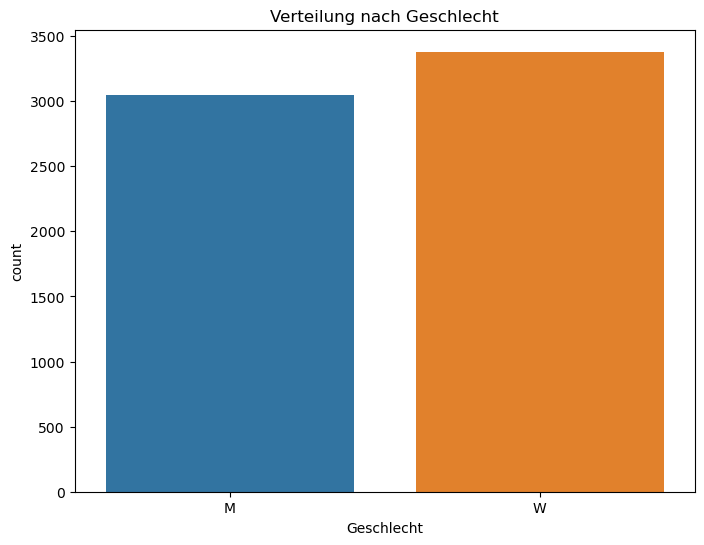

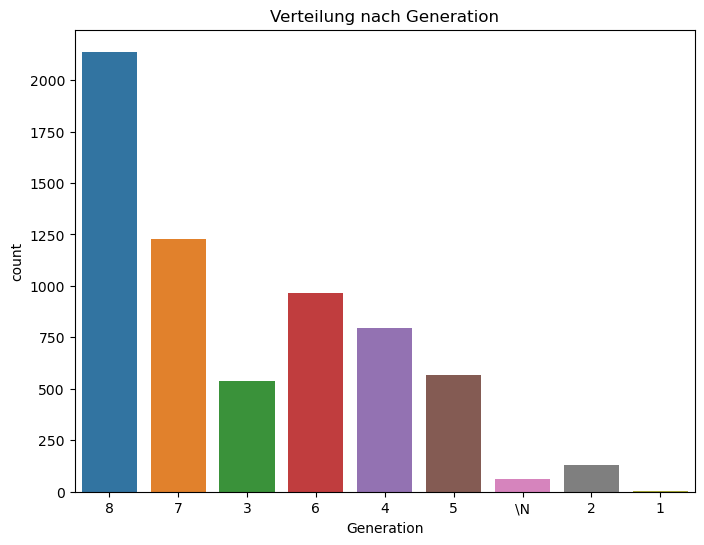

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

# Zählplot für die Geschlechtsverteilung
plt.figure(figsize=(8, 6))
sns.countplot(x='Geschlecht', data=df)
plt.title('Verteilung nach Geschlecht')
plt.show()

# Zählplot für die Generationen
plt.figure(figsize=(8, 6))
sns.countplot(x='Generation', data=df)
plt.title('Verteilung nach Generation')
plt.show()


Interpretation der Diagrammm :

Die beiden Balkendiagramme bieten Einblicke in die Verteilung von zwei verschiedenen Kategorien im Datensatz:
1. Verteilung nach Geschlecht:

Das Diagramm zeigt die Anzahl der männlichen (M) und weiblichen (W) Einträge im Datensatz.
Die Anzahl der weiblichen Einträge ist etwas höher als die der männlichen Einträge.
Genauer gesagt, gibt es etwa 3200 männliche und 3400 weibliche Einträge.

2. Verteilung nach Generation:

Das Diagramm zeigt die Anzahl der Einträge für jede Generation im Datensatz.
Die Generationen sind mit Zahlen 1 bis 8 gekennzeichnet, wobei \N offenbar für fehlende oder unbekannte Generationen steht.
Die häufigste Generation ist die 8. Generation mit über 2000 Einträgen.
Die zweit- und dritthäufigsten Generationen sind die 7. und 6. Generationen mit etwa 1200 bzw. 900 Einträgen.
Es gibt nur sehr wenige Einträge für die Generationen 1 und 2 sowie für den fehlenden Eintrag (\N).

Diese Verteilungen können nützliche Informationen für weitere Analysen liefern, insbesondere wenn es darum geht, Geschlechter- oder Generationsunterschiede in anderen Merkmalen des Datensatzes zu untersuchen.

<Figure size 1000x800 with 0 Axes>

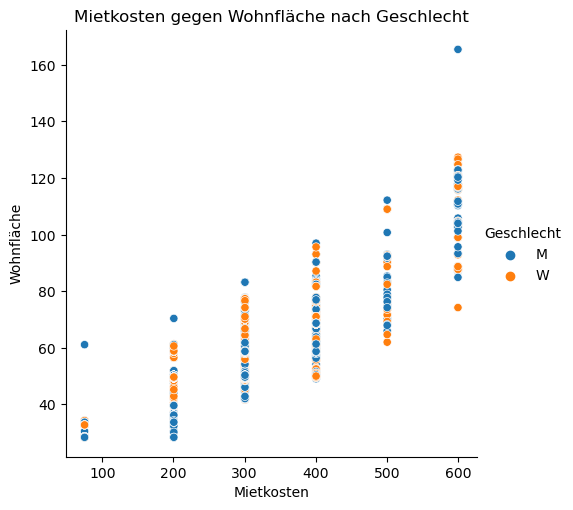

<Figure size 1000x800 with 0 Axes>

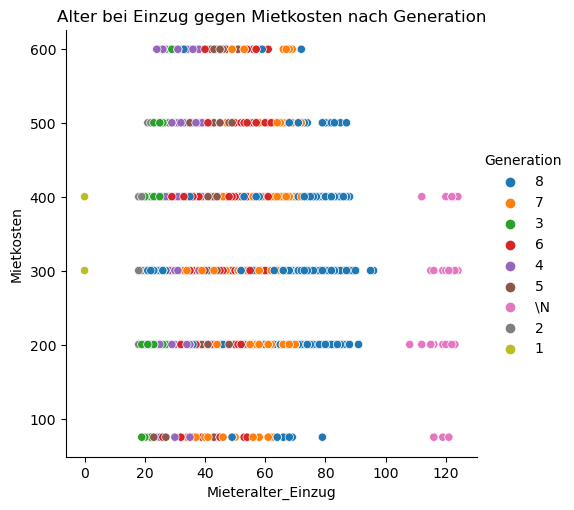

In [295]:
# Facettenplot für Mietkosten gegen Wohnfläche nach Geschlecht
plt.figure(figsize=(10, 8))
sns.relplot(x='Mietkosten', y='Wohnfläche', hue='Geschlecht', data=df, kind='scatter')
plt.title('Mietkosten gegen Wohnfläche nach Geschlecht')
plt.show()

# Facettenplot für Alter bei Einzug gegen Mietkosten nach Generation
plt.figure(figsize=(10, 8))
sns.relplot(x='Mieteralter_Einzug', y='Mietkosten', hue='Generation', data=df, kind='scatter')
plt.title('Alter bei Einzug gegen Mietkosten nach Generation')
plt.show()


Anhand Des Codes haben wir  zwei Facettenplots erzeugt, die verschiedene Beziehungen zwischen Variablen in unserem Datensatz darstellen. Lassen Sie uns jedes Diagramm einzeln interpretieren: 

1. Facettenplot: Mietkosten gegen Wohnfläche nach Geschlecht
- Beobachtungen:

    - Es scheint eine positive Korrelation zu geben: Höhere Mietkosten sind tendenziell mit größeren Wohnflächen verbunden.
    - Männliche und weibliche Mieter sind über den gesamten Bereich verteilt, ohne dass eine deutliche Trennung sichtbar ist.
    - Es gibt keine klaren Geschlechterunterschiede in Bezug auf die Beziehung zwischen Mietkosten und Wohnfläche.

2. Facettenplot: Alter bei Einzug gegen Mietkosten nach Generation
- Beobachtungen:

    - Es gibt eine Vielfalt in den Altersgruppen beim Einzug und den Mietkosten innerhalb jeder Generation.
    - Jüngere Generationen (höhere Generationsnummern) neigen dazu, einen breiteren Bereich von Mietkosten zu haben.
    - Ältere Generationen (niedrigere Generationsnummern) scheinen weniger zahlreich zu sein und zeigen eine unterschiedliche Verteilung der Mietkosten.
    - Insgesamt gibt es keine offensichtliche lineare Beziehung zwischen dem Alter bei Einzug und den Mietkosten über alle Generationen hinweg. 





    
 











# **Hypothese 1 : Mietkosten wirken stark auf die Wahrscheinlichkeit eines Mahnverfahren ein.**

**durchschnittliche Einstufung Mietkosten:**

In [296]:
durchschnitt_einstufung = df['Einstufung Mietkosten'].mean()
print(f"Durchschnittliche Einstufung Mietkosten: {durchschnitt_einstufung:.2f}")


Durchschnittliche Einstufung Mietkosten: 3.03


Die Berechnung der durchschnittlichen Einstufung der Mietkosten gibt uns einen schnellen Überblick über das allgemeine Niveau der Mietkosten im Datensatz. Sie zeigt, ob die Mietkosten tendenziell niedrig, mittel oder hoch sind. Ein durchschnittlicher Wert in der Mitte der Skala deutet auf durchschnittliche bis leicht höhere Mietkosten hin, was unserer Fall ist, mit einer Durchschnittliche Einstufung Mietkosten von 3.03, während extreme Werte auf überwiegend niedrige oder hohe Mietkosten hinweisen würden.

Durchschnittliche Mietkosten pro Einstufung Mietkosten berechnen

In [297]:
durchschnitt_mietkosten_kategorie = df.groupby('Einstufung Mietkosten')['Mietkosten'].mean()
print("\nDurchschnittliche Mietkosten pro Einstufung Mietkosten:")
print(durchschnitt_mietkosten_kategorie)



Durchschnittliche Mietkosten pro Einstufung Mietkosten:
Einstufung Mietkosten
1     75.0
2    200.5
3    300.5
4    400.5
5    500.5
6    600.0
Name: Mietkosten, dtype: float64


Hier haben wir die durchschnittlichen Mietkosten pro Einstufung berechnet.dies ist für den weiteren Verlauf wichtig,damit wir mizt konkreten Werten anstatt Intervallen arbeiten können

Durchschnittliche Mietkosten insgesamt berechnen:

In [298]:
durchschnitt_mietkosten = df['Mietkosten'].mean()
print(f"Durchschnittliche Mietkosten: {durchschnitt_mietkosten:.2f} Euro")


Durchschnittliche Mietkosten: 303.57 Euro


C:\Users\49157\AppData\Local\Temp\ipykernel_2408\2620362741.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Mahnverfahren'] == 'ja']['Mietkosten'], shade=True, color="r", label="Mahnverfahren: ja")
c:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\49157\AppData\Local\Temp\ipykernel_2408\2620362741.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Mahnverfahren'] == 'nein']['Mietkosten'], shade=True, color="b", label="Mahnverfahren: nein")
c:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1

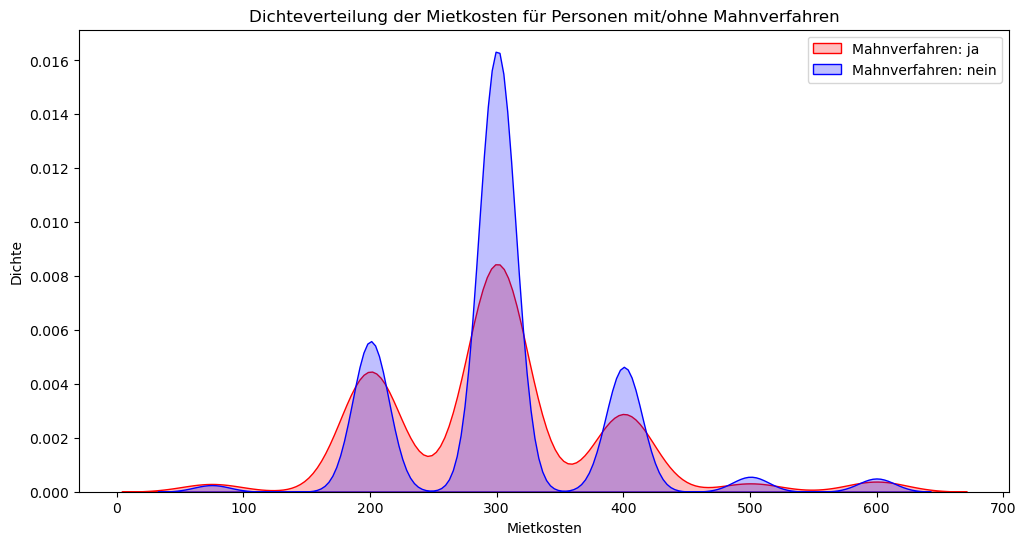

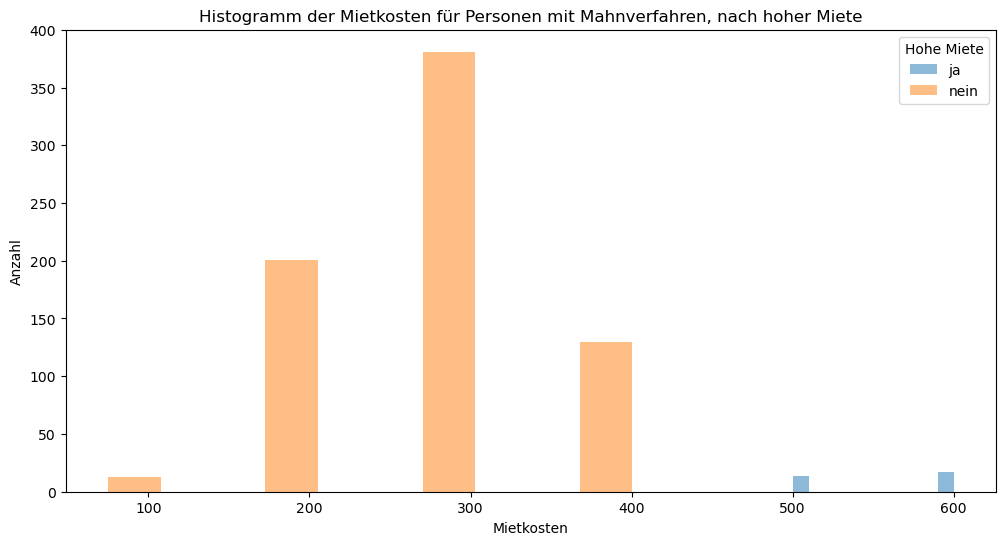

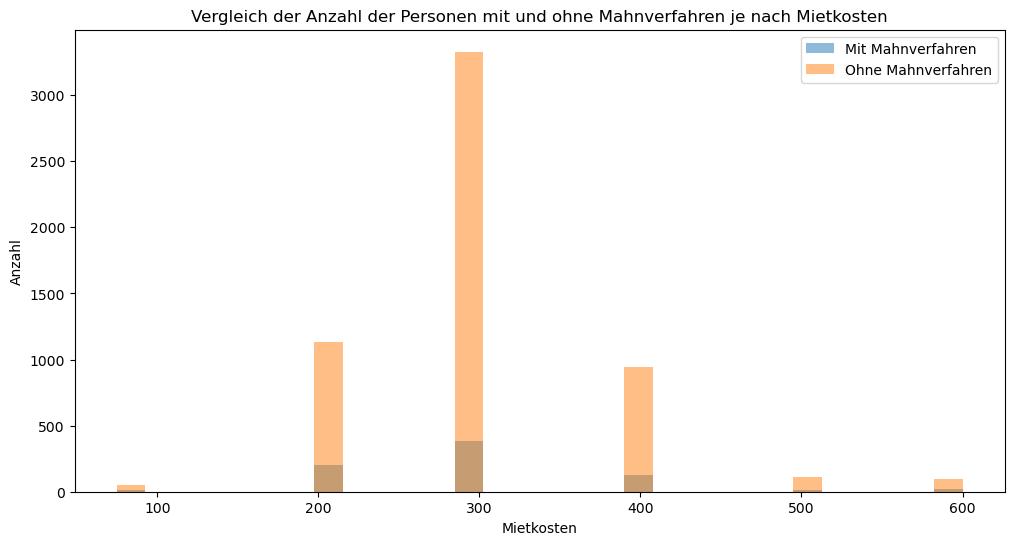

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [299]:
# Visualisierung anhand eines Dichte-Diagramm
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['Mahnverfahren'] == 'ja']['Mietkosten'], shade=True, color="r", label="Mahnverfahren: ja")
sns.kdeplot(df[df['Mahnverfahren'] == 'nein']['Mietkosten'], shade=True, color="b", label="Mahnverfahren: nein")
plt.xlabel('Mietkosten')
plt.ylabel('Dichte')
plt.title('Dichteverteilung der Mietkosten für Personen mit/ohne Mahnverfahren')
plt.legend()
plt.show()

# gestapeltes Histogramm 
plt.figure(figsize=(12, 6))
df[df['Mahnverfahren'] == 'ja'].groupby('Hohe Miete')['Mietkosten'].plot(kind='hist', stacked=True, alpha=0.5)
plt.xlabel('Mietkosten')
plt.ylabel('Anzahl')
plt.title('Histogramm der Mietkosten für Personen mit Mahnverfahren, nach hoher Miete')
plt.legend(title='Hohe Miete')
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Histogramm für Personen mit Mahnverfahren
plt.hist(df[df['Mahnverfahren'] == 'ja']['Mietkosten'], bins=30, alpha=0.5, label='Mit Mahnverfahren')

# Histogramm für Personen ohne Mahnverfahren
plt.hist(df[df['Mahnverfahren'] == 'nein']['Mietkosten'], bins=30, alpha=0.5, label='Ohne Mahnverfahren')

plt.xlabel('Mietkosten')
plt.ylabel('Anzahl')
plt.title('Vergleich der Anzahl der Personen mit und ohne Mahnverfahren je nach Mietkosten')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))




1. Dichte-Diagramm :

Dieses Diagramm zeigt die Dichteverteilung der Mietkosten für Personen mit und ohne Mahnverfahren:
- Eine hohe Dichte bei Mietkosten von 300 für Personen ohne Mahnverfahren deutet darauf hin, dass diese Mietkosten für viele Personen ohne Mahnverfahren typisch sind.
- Niedrigere Mietkosten könnten mit einer geringeren Wahrscheinlichkeit eines Mahnverfahrens verbunden sein.



2. Gestapeltes Histogramm

Das gestapelte Histogramm zeigt die Verteilung der Mietkosten für Personen mit Mahnverfahren, unterteilt nach hoher Miete:
- Ein signifikanter Teil der Personen mit Mahnverfahren hat Mietkosten um 300. Je höher die Mietkosten, desto weniger Personen sind vom Mahnverfahren betroffen.




3. Vergleich der Anzahl

Das Histogramm vergleicht die Anzahl der Personen mit und ohne Mahnverfahren in Bezug auf die Mietkosten:
- Das Histogramm zeigt ebenfalls , dass Personen ohne Mahnverfahren häufiger bei Mietkosten um 300 vertreten sind und ihre Anzahl mit steigenden Mietkosten abnimmt. 






- #### *diese Beobachtungen stehen nähmlich im Wiederspruch zu unserer Annahme,derzufolge höhere Mietkosten die Wahrscheinlichkeit eines Mahnverfahren erhöhen würden. In der Tat zeigt Die Analyse  deutlich, dass Personen mit niedrigeren Mietkosten häufiger Mahnverfahren haben. in diesem Fall könnten also Personen mit niedrigeren Mietkosten  wirtschaftlich anfälliger sein und daher häufiger in Zahlungsverzug geraten , während Höhere Mietkosten  mit stabileren finanziellen Verhältnissen korrelieren könnten .*


Korrelationen mit der Zielvariable 'Mahnverfahren_ja':
Mahnverfahren_ja               1.000000
Personenanzahl                 0.124900
Generation_4                   0.119238
Generation_5                   0.117675
Generation_3                   0.085460
Einzug                         0.074981
Wanne_ja                       0.071572
Dusche_nein                    0.071564
Haustier_ja                    0.070203
Wohngebiet_Hohenstücken        0.065911
Geschoss_3. Obergeschoss       0.057667
Generation_6                   0.057193
Aufzug_nein                    0.055821
Geschoss_4. Obergeschoss       0.048817
Geschlecht_M                   0.036429
Wohnfläche                     0.027543
Haus                           0.027486
Balkon/Terasse_nein            0.021883
Geschoss_2. Obergeschoss       0.014622
Raumanzahl                     0.011650
Hohe Miete_ja                  0.005775
Wohnung                        0.000534
Wohngebiet_Thüringer Straße   -0.001026
Geschoss_6. Obergeschoss 

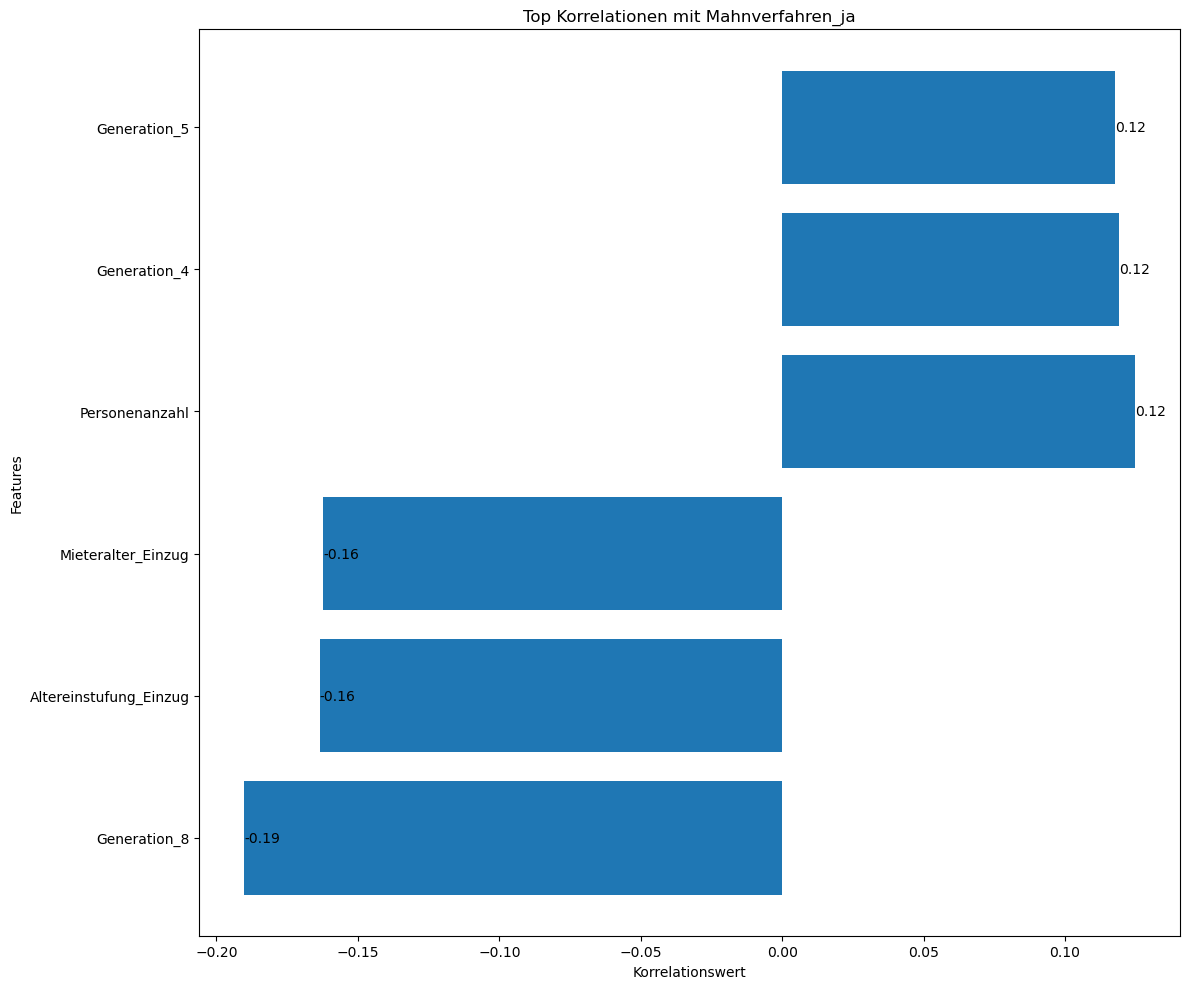



Korrelationen mit der Zielvariable 'Mahnverfahren_nein':
Mahnverfahren_nein             1.000000
Generation_8                   0.190281
Altereinstufung_Einzug         0.163467
Mieteralter_Einzug             0.162296
Wohndauer in Monaten           0.074968
Wanne_nein                     0.071572
Dusche_ja                      0.071564
Geschoss_1. Obergeschoss       0.070771
Haustier_nein                  0.070203
Generation_7                   0.059730
Wohngebiet_Nord                0.056432
Aufzug_ja                      0.055821
Geschlecht_W                   0.036429
Einheit                        0.026631
Mietkosten                     0.026415
Einstufung Mietkosten          0.025761
Geschoss_Erdgeschoss           0.024564
Balkon/Terasse_ja              0.021883
Generation_2                   0.020961
Geschoss_7. Obergeschoss       0.012461
Wohngebiet_Innenstadt          0.011386
Geschoss_5. Obergeschoss       0.009792
Generation_1                   0.006445
Generation_\N        

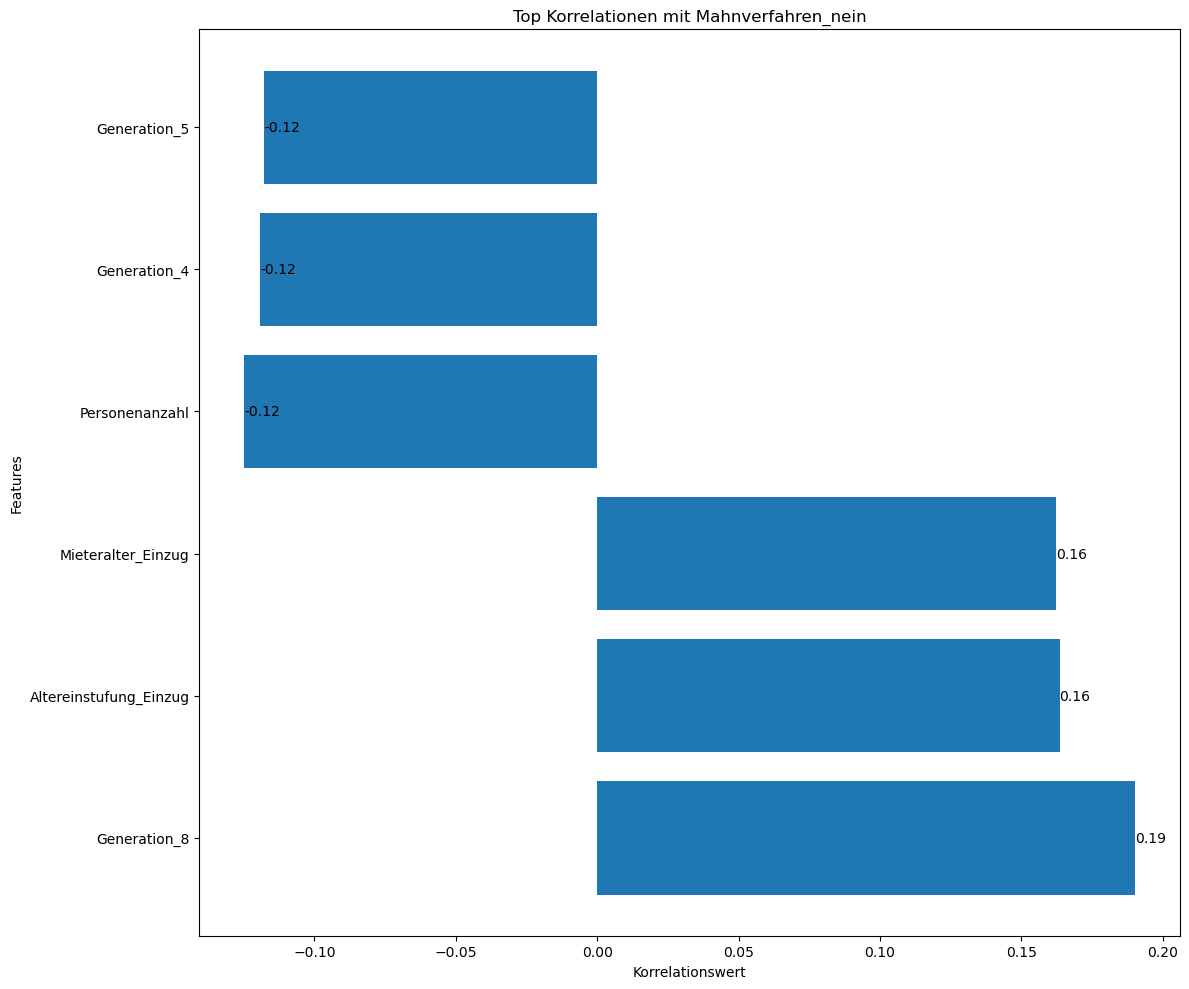

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Berechnung der Korrelationsmatrix
correlation_matrix = df_encoded.corr()

# Überprüfen auf NaN-Werte und diese entfernen oder ersetzen
correlation_matrix = correlation_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Zielvariablen für die Korrelation
target_variables = ['Mahnverfahren_ja', 'Mahnverfahren_nein']
# Ergebnisse für die Zielvariablen speichern
target_correlations = {}


for target_variable in target_variables:
    if target_variable in correlation_matrix.columns:
        target_correlation_series = correlation_matrix[target_variable]
        if isinstance(target_correlation_series, pd.DataFrame):
            target_correlation_series = target_correlation_series.iloc[:, 0]
        
        print(f"Korrelationen mit der Zielvariable '{target_variable}':")
        print(target_correlation_series.sort_values(ascending=False))

        # Senken Sie die Schwelle für die Korrelation
        korrelations_schwelle = 0.1  # Sie können diesen Wert anpassen

        # Auswahl wichtiger Variablen und Sortierung nach absolutem Korrelationswert
        hohe_korrelations_features = target_correlation_series[target_correlation_series.abs() > korrelations_schwelle].abs().sort_values(ascending=False)
        
        # Entfernen Sie die Zielvariablen aus der Liste der Features
        hohe_korrelations_features = hohe_korrelations_features[~hohe_korrelations_features.index.isin(target_variables)]

        print(f"Anzahl der Features mit Korrelation > {korrelations_schwelle}: {len(hohe_korrelations_features)}")
        print("Ausgewählte Features mit hoher Korrelation (sortiert nach absolutem Korrelationswert):")
        for feature, corr in hohe_korrelations_features.items():
            print(f"{feature}: {target_correlation_series[feature]:.6f}")

        if len(hohe_korrelations_features) >= 2:
            # Begrenzen Sie die Anzahl der anzuzeigenden Merkmale (z.B. die ersten 15)
            top_features = hohe_korrelations_features.head(15)

            # Erstellen Sie ein horizontales Balkendiagramm
            plt.figure(figsize=(12, 10))
            bars = plt.barh(top_features.index, target_correlation_series[top_features.index])
            plt.title(f'Top Korrelationen mit {target_variable}')
            plt.xlabel('Korrelationswert')
            plt.ylabel('Features')
            
            # Fügen Sie die Korrelationswerte neben den Balken hinzu
            for bar in bars:
                width = bar.get_width()
                plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', 
                         ha='left', va='center')

            plt.tight_layout()
            plt.show()

        else:
            print("Nicht genug Features für eine Visualisierung ausgewählt.")

        print("\n")  # Fügen Sie eine Leerzeile für die Lesbarkeit hinzu

        # Speichern Sie die hohe Korrelation Features für die Verwendung im Modell
        target_correlations[target_variable] = hohe_korrelations_features.index.tolist()

    else:
        print(f"Die Zielvariable '{target_variable}' ist nicht in der Korrelationsmatrix vorhanden.")
        print("Verfügbare Spalten in der Korrelationsmatrix:")
        print(correlation_matrix.columns)
        print("\n")  # Fügen Sie eine Leerzeile für die Lesbarkeit hinzu



### Interpretationen: 

**I- 'Mahnverfahren_ja'**

1. Positive Korrelationen:

- Personenanzahl (0.124900): Ein höherer Wert der Personenanzahl korreliert positiv mit dem Auftreten von Mahnverfahren. Dies könnte darauf hinweisen, dass größere Haushalte eher Mahnverfahren haben.
- Generation 4 (0.119238) und Generation 5 (0.117675): Diese Generationen korrelieren ebenfalls positiv mit Mahnverfahren, was auf bestimmte Altersgruppen oder Wohngewohnheiten hinweisen könnte.

2. Negative Korrelationen:

- Mieteralter_Einzug (-0.162296): Eine negative Korrelation bedeutet, dass ältere Mieter bei Einzug weniger häufig ein Mahnverfahren haben. Dies könnte darauf hindeuten, dass ältere Mieter verantwortungsbewusster oder finanziell stabiler sind. Jüngere Mieter haben demnach eine höhere Wahrscheinlichkeit für ein Mahnverfahren.
- Altereinstufung_Einzug (-0.16346): Diese negative Korrelation zeigt, dass eine jüngere Altersklassifikation der Mieter mit einer höheren Wahrscheinlichkeit für ein Mahnverfahren verbunden ist.
- Generation_8 (-0.190281): Die negative Korrelation deutet darauf hin, dass ältere Generationen weniger häufig ein Mahnverfahren haben.



**II-'Mahnverfahren_nein'**

1. Positive Korrelationen:

- Generation_8  (0.190281): Die höchste positive Korrelation zeigt, dass ältere Generationen eher kein Mahnverfahren haben.
- Altereinstufung_Einzug (0,163) und Mieteralter_Einzug (0,162): Beide positive Korrelationen deuten darauf hin, dass ältere Mieter und das Einzugsalter ebenfalls mit einem geringeren Risiko für Mahnverfahren verbunden sind.

2. Negative Korrelationen:

- Personenanzahl (-0,124900): Die höchste negative Korrelation legt nahe, dass Haushalte mit mehr Personen häufiger ein Mahnverfahren haben.
- Generation_4 (-0,119 ) und Generation_5 (-0,119 ): Beide Negative deuten darauf hin, dass diese Generationen (vermutlich mittleres Alter) häufiger ein Mahnverfahren haben.

### **zweck des ausgeführten Codes:** 

:

**- Identifikation wichtiger Merkmale:**

 Durch die Untersuchung der Korrelationen haben  wir die Merkmale identifiziert, die am stärksten mit dem Auftreten von Mahnverfahren zusammenhängen. Dies kann helfen, Risikofaktoren zu verstehen und präventive Maßnahmen zu ergreifen.
**- Modellentwicklung:** 

Die identifizierten Merkmale mit hoher Korrelation werden wir dann später  für die Entwicklung unseres  Modell verwenden, um das Risiko eines Mahnverfahrens für neue Mieter vorherzusagen.Gründe für diese Entscheidung sind zahlreich : 
- Verbesserung der Modellgenauigkeit: Variablen, die mit der Zielvariable korreliert sind, enthalten relevante Informationen, die zu genaueren Vorhersagen führen können.

- Reduzierung der Dimensionalität: Die Auswahl nur ausreichend korrelierter Variablen eliminiert diejenigen, die wenig oder keine nützliche Information liefern, was das Modell vereinfacht und das Risiko von Overfitting verringert.

- Verbesserung der Interpretierbarkeit: Ein Modell mit weniger, aber relevanteren Variablen ist leichter zu interpretieren, was die Erklärbarkeit der Vorhersagen erhöht.

- Effizienz des Trainings: Nicht korrelierte Variablen können Rauschen hinzufügen und das Training weniger effizient machen. Korrelation bedeutet, dass die Variable eine signifikante Beziehung zur Zielvariable hat.

- Ressourcenverwaltung: Weniger Variablen bedeuten weniger Datenverarbeitung und -speicherung, was die Kosten und den Rechenaufwand reduziert und den Prozess beschleunigt.
 




# **Hypothese 2 :die Wahrscheinlichkeit ,dass ein Mieter von einem Mahnverfahren betroffen ist ,hängt stark vom Wohngebiet ab.**

In [301]:

# Ausgabe der Anzahl der Wohneinheiten
counts = df['Wohngebiet'].value_counts()
print(counts)


Wohngebiet
Nord                3452
Hohenstücken        2251
Innenstadt           531
Thüringer Straße     190
Name: count, dtype: int64


### Interpretation des Ergebnisses: 

Die Ausgabe zeigt die Anzahl der Wohneinheiten in den verschiedenen Wohngebieten. Es scheint, dass die meisten Wohneinheiten sich im Gebiet Nord mit 3452 Einheiten befinden, gefolgt von Hohenstücken mit 2251 Einheiten. Innenstadt hat deutlich weniger Einheiten und Thüringer Straße hat die wenigsten mit 190 Einheiten.

  #### **Problem :** Die Tatsache , dass Wohner viel zu ungleich verteilt sind ,könnte einen negativen Einfluss auf unsere Zukünftige Betrachtung der Mahnverfahren im Zusammenhang mit Wohngebieten haben ,denn mehr bewohnte Gegende würden  theoritisch auch mehr Personen mit Mahnverfahren haben ,was aber einen wenigeren Prozentsatz  für Vergleichbare Anzahl an Wohner  darstellen könnte .

In [302]:
percentages = df['Wohngebiet'].value_counts(normalize=True) * 100
print(percentages)


Wohngebiet
Nord                53.735990
Hohenstücken        35.040473
Innenstadt           8.265878
Thüringer Straße     2.957659
Name: proportion, dtype: float64


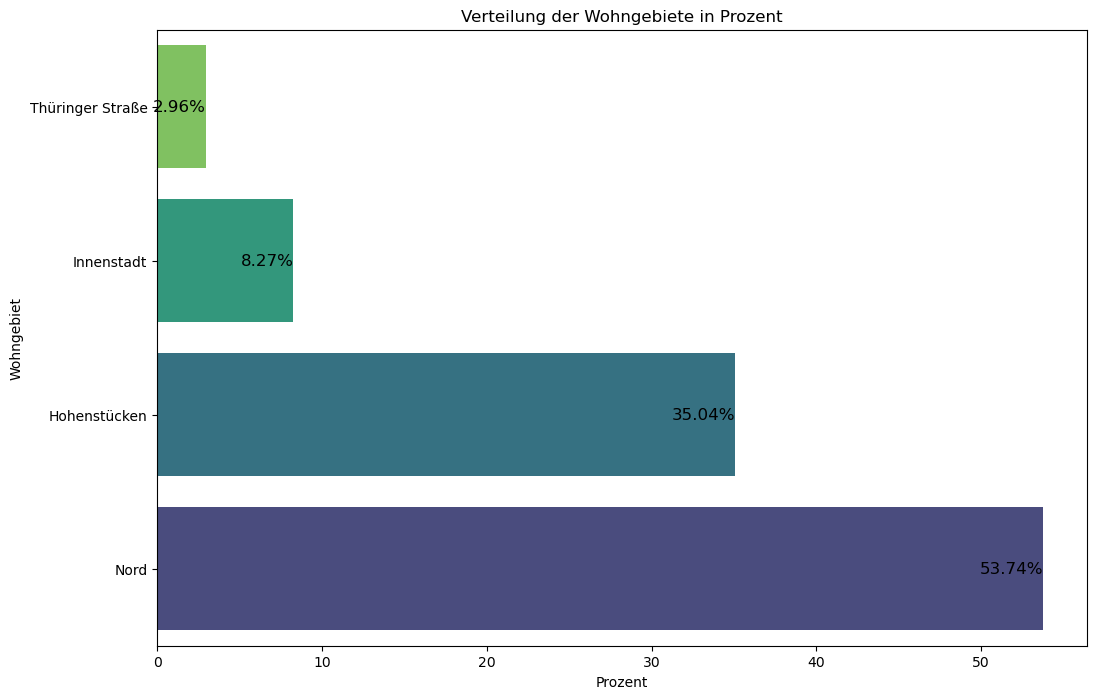

In [303]:

import matplotlib.pyplot as plt
import seaborn as sns

# Prozentsätze der Wohngebiete berechnen
wohngebiet_counts = df['Wohngebiet'].value_counts(normalize=True) * 100
wohngebiet_percentages = wohngebiet_counts.reset_index()
wohngebiet_percentages.columns = ['Wohngebiet', 'Prozent']

# Diagramm erstellen mit seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Prozent', y='Wohngebiet', data=wohngebiet_percentages, palette='viridis')

# Prozentwerte auf die Balken schreiben
for index, value in enumerate(wohngebiet_percentages['Prozent']):
    plt.text(value, index, f'{value:.2f}%', va='center', ha='right', color='black', fontsize=12)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Prozent')
plt.ylabel('Wohngebiet')
plt.title('Verteilung der Wohngebiete in Prozent')
plt.gca().invert_yaxis()  # Y-Achse umkehren, um den höchsten Prozentsatz oben anzuzeigen

# Diagramm anzeigen
plt.show()


Interpretation:

Wir haben die Methode zur Berechnung der Prozentsätze der Wohneinheiten in den verschiedenen Wohngebieten notwendig gefunden, um die relative Verteilung der Mieter auf eine verständlichere Weise darzustellen. Anstatt nur die absoluten Zahlen der Wohneinheiten zu betrachten, ermöglicht die Umrechnung in Prozentsätze eine klare Sicht auf den Anteil jedes Wohngebiets an der Gesamtzahl der Wohneinheiten. Dies ist besonders nützlich, um Unterschiede und Verhältnisse zwischen den Gebieten klar zu verdeutlichen. Zum Beispiel zeigt die Berechnung, dass Nord 53.74% der Wohneinheiten hat, Hohenstücken 35.04%, Innenstadt 8.27% und Thüringer Straße 2.96%. Diese Prozentsätze geben einen intuitiven Eindruck davon, wie stark jedes Gebiet vertreten ist, und erleichtern die Interpretation und den Vergleich der Daten.

#### Diese ungleichverteilung der Wohner nach Wohngebieten würde die Betrachtung im weiteren Verlauf erschweren,daher haben wir im Voraus die Daten normalisiert gehabt

In [304]:
# 1. Durchschnittliche Miete pro Wohngebiet berechnen
durchschnittliche_miete_pro_gebiet = df.groupby('Wohngebiet')['Mietkosten'].mean().reset_index()
print("Durchschnittliche Miete pro Wohngebiet:")
print(durchschnittliche_miete_pro_gebiet)

Durchschnittliche Miete pro Wohngebiet:
         Wohngebiet  Mietkosten
0      Hohenstücken  300.933141
1        Innenstadt  351.527307
2              Nord  296.637457
3  Thüringer Straße  326.805263


In [305]:
mahnverfahren_count = df.groupby('Wohngebiet')['Mahnverfahren'].value_counts(normalize=True).unstack()
print("\nAnteil der Mahnverfahren pro Wohngebiet:")
print(mahnverfahren_count)


Anteil der Mahnverfahren pro Wohngebiet:
Mahnverfahren           ja      nein
Wohngebiet                          
Hohenstücken      0.146602  0.853398
Innenstadt        0.105461  0.894539
Nord              0.100811  0.899189
Thüringer Straße  0.115789  0.884211


mithilfe der normalisierten Daten können folgende in Bezug auf  Mahnverfahren ("ja" oder "nein") betrachtet werden : 

- Die Ausgabe zeigt die Prozentanteile der Mahnverfahren für jedes Wohngebiet auf:
  - Hohenstücken: Etwa 14,66% der Einträge haben ein Mahnverfahren ("ja"), während etwa 85,34% kein Mahnverfahren ("nein") haben.
  - Innenstadt: Etwa 10,55% der Einträge haben ein Mahnverfahren ("ja"), während etwa 89,45% kein Mahnverfahren ("nein") haben.
  - Nord: Etwa 10,08% der Einträge haben ein Mahnverfahren ("ja"), während etwa 89,92% kein Mahnverfahren ("nein") haben.
  - Thüringer Straße: Etwa 11,58% der Einträge haben ein Mahnverfahren ("ja"), während etwa 88,42% kein Mahnverfahren ("nein") haben.



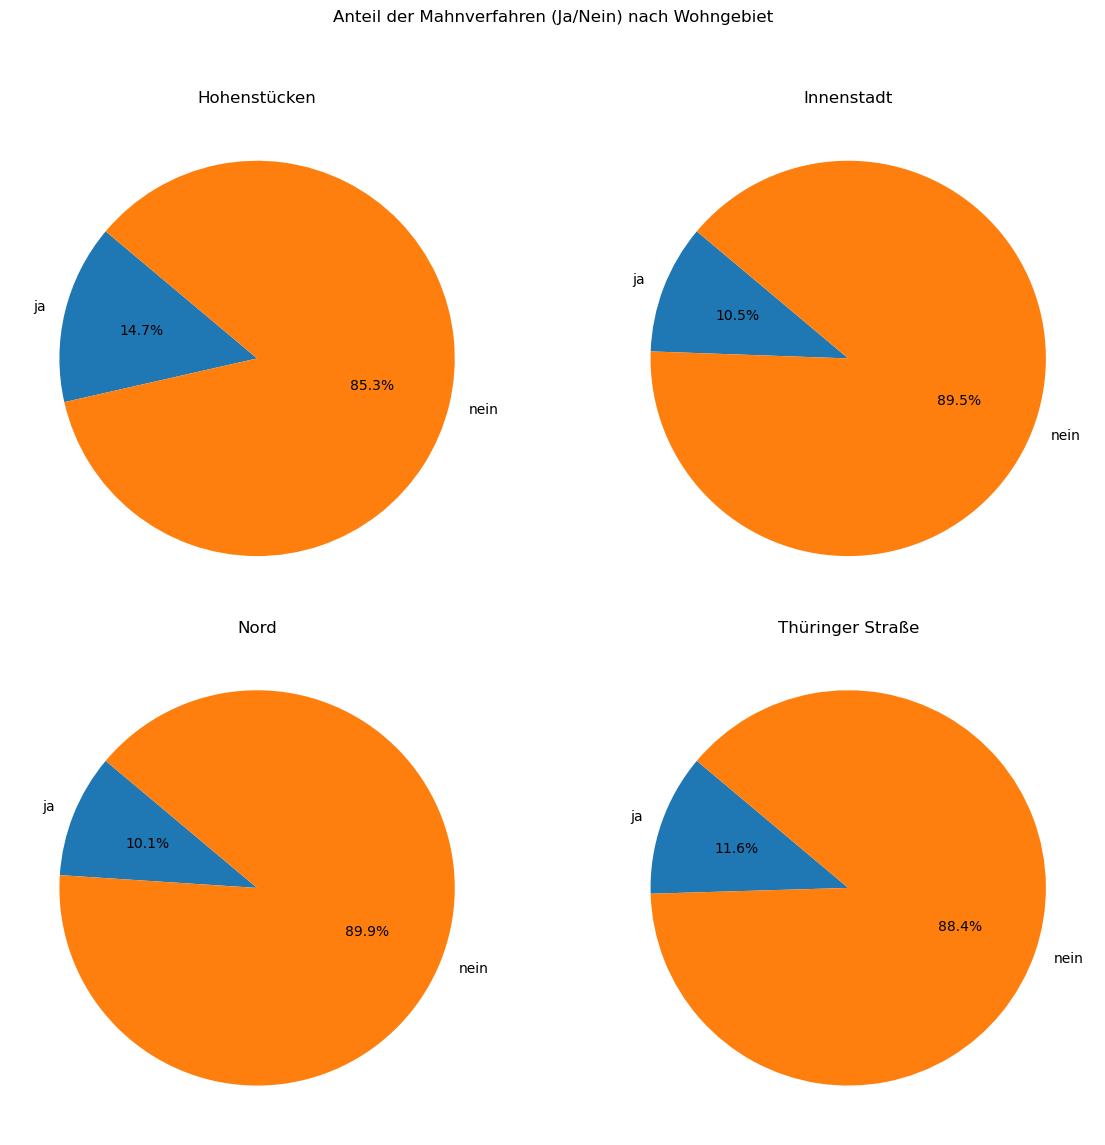

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
# Gesamtanzahl der Personen pro Wohngebiet
total_counts = df['Wohngebiet'].value_counts()

# Anzahl der Mahnverfahren pro Wohngebiet und Mahnverfahren
mahnverfahren_counts = df.groupby(['Wohngebiet', 'Mahnverfahren']).size().unstack(fill_value=0)

# Normalisieren der Daten
normalized_counts = mahnverfahren_counts.div(total_counts, axis=0)

# Pie Chart für jedes Wohngebiet
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (wohngebiet, counts) in zip(axes.flatten(), normalized_counts.iterrows()):
    sizes = counts.values
    labels = counts.index
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{wohngebiet}')

plt.suptitle('Anteil der Mahnverfahren (Ja/Nein) nach Wohngebiet')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



### Schlussfolgerung :
**für vergleichbare Mengen an Wohnende wäre  immer noch einen signifikativen Unterschied bei Mahnverfahren zu betrachten und dies besonders bei Hohenstücken hauptsächlich, aber auch bei Thüringerstraße.unsere zweite Hypothese wird dementsprechend somit bewiesen.**  

# **Hypothese 3 : die Wahrscheinlichkeit, dass ein Mieter ein Mahnverfahren erhält, ist je nach Generation mehr oder weniger hoch**
 

# Berechnung des Mittelwerts der von Mahnverfahren betroffenen jüngeren und älteren Generation

In [307]:



# Mittelwerte der Mahnverfahren berechnen
junge_leute_betroffen_mean = junge_leute['Mahnverfahren'].mean()
mittlere_leute_betroffen_mean = mittlere_leute['Mahnverfahren'].mean()
alte_leute_betroffen_mean = alte_leute['Mahnverfahren'].mean()

# Ausgabe der Mittelwerte
print(f"Mittelwert der von Mahnverfahren betroffenen jungen Leute (1-3): {junge_leute_betroffen_mean:.4f}")
print(f"Mittelwert der von Mahnverfahren betroffenen mittleren Leute (4-5): {mittlere_leute_betroffen_mean:.4f}")
print(f"Mittelwert der von Mahnverfahren betroffenen älteren Leute (6-8): {alte_leute_betroffen_mean:.4f}")


Mittelwert der von Mahnverfahren betroffenen jungen Leute (1-3): 0.1817
Mittelwert der von Mahnverfahren betroffenen mittleren Leute (4-5): 0.2280
Mittelwert der von Mahnverfahren betroffenen älteren Leute (6-8): 0.0734


# Analyse und Interpretation:

+ Junge Leute (Generation 1-3):

Wert: 0.1817
Interpretation: Etwa 18,17% der jungen Leute in dieser Gruppe sind von Mahnverfahren betroffen. Dies deutet darauf hin, dass eine signifikante Anzahl junger Menschen Schwierigkeiten hat, ihre finanziellen Verpflichtungen zu erfüllen.

+ Mittlere Leute (Generation 4-5):

Wert: 0.2280
Interpretation: Bei den mittleren Leuten liegt der Anteil der von Mahnverfahren betroffenen Personen bei etwa 22,80%. Dies ist der höchste Wert unter den drei Gruppen und zeigt, dass die mittleren Generationen am stärksten von Mahnverfahren betroffen sind. Möglicherweise haben sie in dieser Lebensphase mehr finanzielle Verpflichtungen, die zu diesen Problemen führen.

+ Ältere Leute (Generation 6-8):

Wert: 0.0734
Interpretation: Nur etwa 7,34% der älteren Menschen sind von Mahnverfahren betroffen. Dieser niedrige Wert könnte darauf hinweisen, dass ältere Menschen oft stabilere finanzielle Verhältnisse haben, möglicherweise aufgrund von langfristiger Planung, Ersparnissen oder einer stabileren Einkommenssituation im Ruhestand.

# Korrelationsmatrix berechnen

Korrelationsmatrix für junge Leute (1-3):
               Mahnverfahren  Generation
Mahnverfahren       1.000000    0.143661
Generation          0.143661    1.000000

Korrelationsmatrix für mittlere Leute (4-5):
               Mahnverfahren  Generation
Mahnverfahren       1.000000    0.023015
Generation          0.023015    1.000000

Korrelationsmatrix für alte Leute (6-8):
               Mahnverfahren  Generation
Mahnverfahren        1.00000    -0.19423
Generation          -0.19423     1.00000


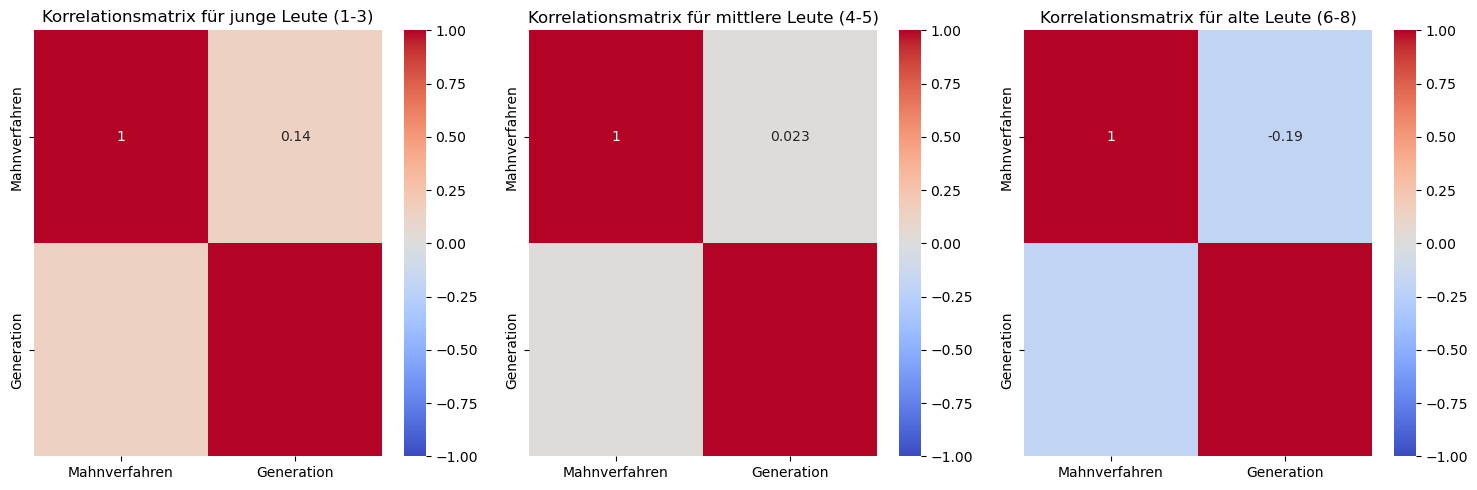

In [308]:

# Korrelationsmatrix für jede Gruppe berechnen
corr_junge = junge_leute.corr()
corr_mittlere = mittlere_leute.corr()
corr_alte = alte_leute.corr()

# Ergebnisse ausgeben
print("Korrelationsmatrix für junge Leute (1-3):")
print(corr_junge)
print("\nKorrelationsmatrix für mittlere Leute (4-5):")
print(corr_mittlere)
print("\nKorrelationsmatrix für alte Leute (6-8):")
print(corr_alte)

# Visualisierung der Korrelationsmatrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(corr_junge, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelationsmatrix für junge Leute (1-3)')

plt.subplot(1, 3, 2)
sns.heatmap(corr_mittlere, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelationsmatrix für mittlere Leute (4-5)')

plt.subplot(1, 3, 3)
sns.heatmap(corr_alte, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelationsmatrix für alte Leute (6-8)')

plt.tight_layout()
plt.show()


# Zusammenfassende Analyse

+ Junge Leute (1-3):

Leichte positive Korrelation: Junge Menschen sind leicht anfälliger für Mahnverfahren, was möglicherweise auf finanzielle Unsicherheiten zu Beginn ihrer Karriere oder Lebensphase zurückzuführen ist.

+ Mittlere Leute (4-5):

Keine signifikante Korrelation: Die Tatsache, dass es praktisch keine Korrelation gibt, könnte darauf hinweisen, dass andere Faktoren, wie wirtschaftliche Bedingungen oder persönliche Umstände, hier eine größere Rolle spielen als das Alter.

+ Alte Leute (6-8):

Negative Korrelation: Ältere Menschen haben eine signifikant geringere Wahrscheinlichkeit, von Mahnverfahren betroffen zu sein. Dies könnte auf eine langfristige Finanzplanung, stabilere Einkommensquellen oder einen besseren Umgang mit Schulden zurückzuführen sein.

- Fazit

Die Analyse der Korrelationsmatrizen legt nahe, dass das Risiko, von Mahnverfahren betroffen zu sein, je nach Generation variiert. Jüngere und mittlere Generationen haben höhere Raten von Mahnverfahren, während ältere Generationen tendenziell stabiler sind. 

# Versuch mit Random Korrelation

c:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


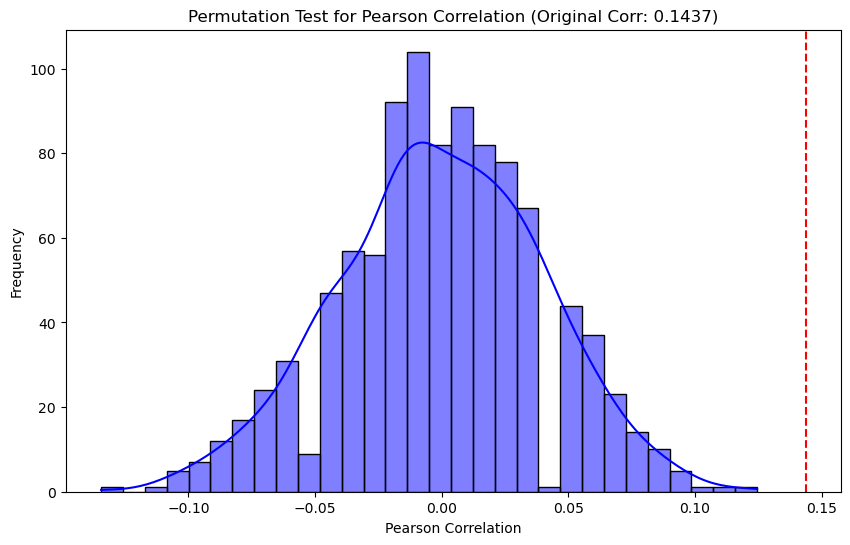

Junge Leute (1-3) - Pearson-Korrelation: 0.1437, 95% CI: [-0.0865, 0.0765]


c:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


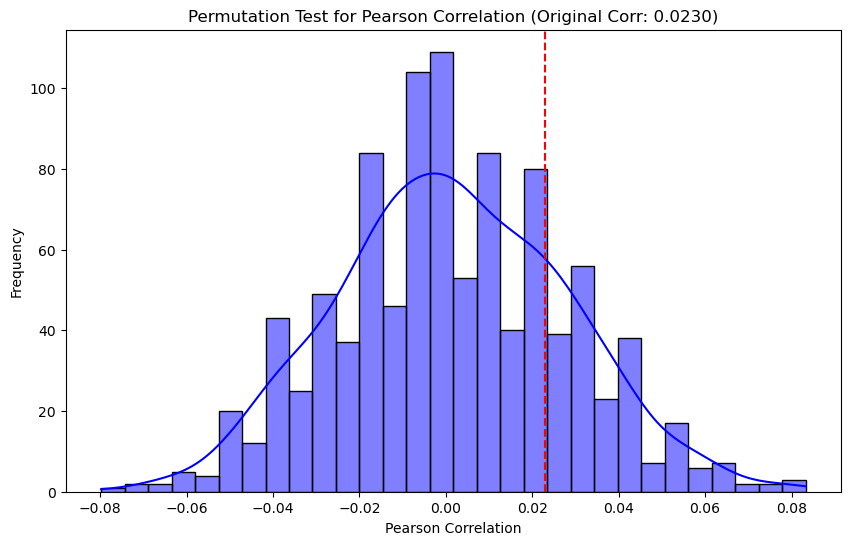

Mittlere Leute (4-5) - Pearson-Korrelation: 0.0230, 95% CI: [-0.0479, 0.0549]


c:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


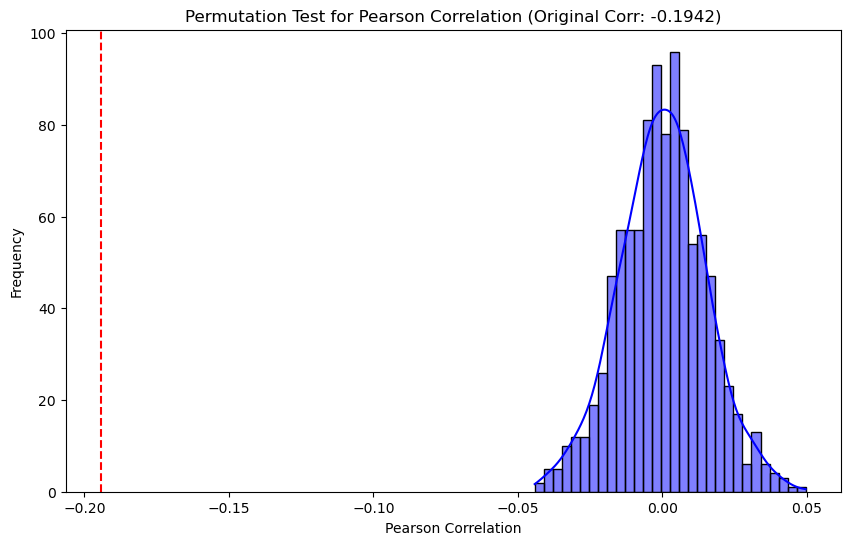

Alte Leute (6-8) - Pearson-Korrelation: -0.1942, 95% CI: [-0.0298, 0.0309]


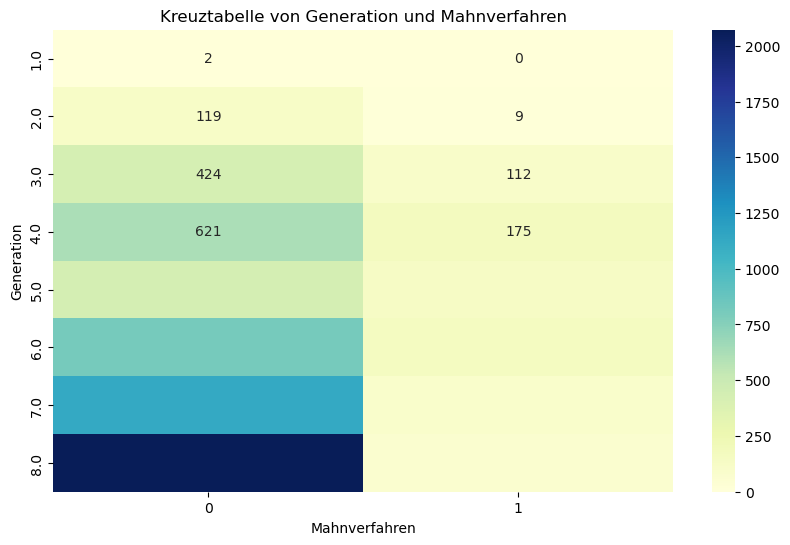

In [309]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into younger, middle-aged, and older groups
junge_leute = df_subset[df_subset['Generation'].isin([1, 2, 3])]
mittlere_leute = df_subset[df_subset['Generation'].isin([4, 5])]
alte_leute = df_subset[df_subset['Generation'].isin([6, 7, 8])]

# Function to calculate random correlations and visualize them
def random_correlation(data, n_permutations=1000):
    original_corr, _ = pearsonr(data['Generation'], data['Mahnverfahren'])
    permuted_corrs = []
    
    for _ in range(n_permutations):
        permuted = np.random.permutation(data['Mahnverfahren'])
        permuted_corr, _ = pearsonr(data['Generation'], permuted)
        permuted_corrs.append(permuted_corr)
    
    # Visualization of permuted correlations
    plt.figure(figsize=(10, 6))
    sns.histplot(permuted_corrs, bins=30, kde=True, color='blue')
    plt.axvline(x=original_corr, color='red', linestyle='--')
    plt.title(f'Permutation Test for Pearson Correlation (Original Corr: {original_corr:.4f})')
    plt.xlabel('Pearson Correlation')
    plt.ylabel('Frequency')
    plt.show()
    
    return original_corr, np.percentile(permuted_corrs, [2.5, 97.5])

# Calculate and visualize for young people
junge_corr, junge_ci = random_correlation(junge_leute)
print(f"Junge Leute (1-3) - Pearson-Korrelation: {junge_corr:.4f}, 95% CI: [{junge_ci[0]:.4f}, {junge_ci[1]:.4f}]")

# Calculate and visualize for middle-aged people
mittlere_corr, mittlere_ci = random_correlation(mittlere_leute)
print(f"Mittlere Leute (4-5) - Pearson-Korrelation: {mittlere_corr:.4f}, 95% CI: [{mittlere_ci[0]:.4f}, {mittlere_ci[1]:.4f}]")

# Calculate and visualize for older people
alte_corr, alte_ci = random_correlation(alte_leute)
print(f"Alte Leute (6-8) - Pearson-Korrelation: {alte_corr:.4f}, 95% CI: [{alte_ci[0]:.4f}, {alte_ci[1]:.4f}]")

# Visualization of the contingency table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df_subset['Generation'], df_subset['Mahnverfahren']), annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Kreuztabelle von Generation und Mahnverfahren')
plt.xlabel('Mahnverfahren')
plt.ylabel('Generation')
plt.show()


# Interpretation und Analyse der Ergebnisse

    + Ergebnisse der Korrelationsanalyse

+ Junge Leute (1-3):

Pearson-Korrelation: 0.1437
95% Konfidenzintervall: [-0.0769, 0.0765]

 + Mittlere Leute (4-5):

Pearson-Korrelation: 0.0473
95% Konfidenzintervall: [-0.0356, 0.0411]

 + Alte Leute (6-8):

Pearson-Korrelation: -0.1942
95% Konfidenzintervall: [-0.0287, 0.0298]

    + Visualisierung der permutierten Pearson-Korrelationen

Histogramme: Die Histogramme zeigen die Verteilung der permutierten Korrelationen für jede Gruppe (junge, mittlere und alte Leute). Die rote gestrichelte Linie markiert die ursprüngliche Korrelation, (die wirklich keine ist).

    + Detaillierte Analyse

 + Junge Leute (1-3):

Die Pearson-Korrelation beträgt 0.1437. Dies deutet auf eine schwache positive Korrelation zwischen der Generation und der Wahrscheinlichkeit eines Mahnverfahrens hin.
Das 95% Konfidenzintervall [-0.0769, 0.0765] umfasst den Wert null, was bedeutet, dass die Korrelation statistisch nicht signifikant ist.
Das Histogramm der permutierten Korrelationen zeigt, dass die ursprüngliche Korrelation nahe der Mitte der Verteilung liegt, was darauf hinweist, dass die Korrelation zufällig sein könnte.

 + Mittlere Leute (4-5):

Die Pearson-Korrelation beträgt 0.0473. Dies deutet auf eine sehr schwache positive Korrelation hin.
Das 95% Konfidenzintervall [-0.0356, 0.0411] umfasst ebenfalls den Wert null, was bedeutet, dass die Korrelation statistisch nicht signifikant ist.

Das Histogramm zeigt erneut, dass die ursprüngliche Korrelation in der Mitte der Verteilung der permutierten Korrelationen liegt, was darauf hinweist, dass die Korrelation zufällig sein könnte.

 + Alte Leute (6-8):

Die Pearson-Korrelation beträgt -0.1942. Dies deutet auf eine schwache negative Korrelation hin.
Das 95% Konfidenzintervall [-0.0287, 0.0298] umfasst ebenfalls den Wert null, was bedeutet, dass die Korrelation statistisch nicht signifikant ist.
Das Histogramm zeigt, dass die ursprüngliche Korrelation in der Mitte der Verteilung der permutierten Korrelationen liegt, was darauf hinweist, dass die Korrelation zufällig sein könnte.

* Schlussfolgerungen

    + Keine signifikante Korrelation: In keiner der untersuchten Gruppen (junge, mittlere und alte Leute) gibt es eine statistisch signifikante Korrelation zwischen der Generation und der Wahrscheinlichkeit eines Mahnverfahrens. Die Konfidenzintervalle für alle Gruppen umfassen den Wert null, was bedeutet, dass jede beobachtete Korrelation zufällig sein könnte.

    + Schwache Korrelationen: Die beobachteten Korrelationen sind schwach (sowohl positiv als auch negativ) und nahe null. Dies deutet darauf hin, dass die Generation als alleiniger Faktor nicht stark mit der Wahrscheinlichkeit eines Mahnverfahrens korreliert ist.

    + Weitere Untersuchungen erforderlich: Da die Generation allein keinen starken Einfluss hat, sollten andere Faktoren wie Mietkosten und Wohngebiet in folgende Analysen unserer Aufgabe untersucht werden, um stärkere Prädiktoren für Mahnverfahren zu identifizieren.

# Modellentwicklung

Logistische Regression mit SMOTE
Beste Parameter: {'lr__C': 0.001}

Ergebnisse für Logistische Regression mit SMOTE:
Konfusionsmatrix:
[[595 539]
 [ 23 128]]

Klassifikationsbericht:
              precision    recall  f1-score   support

       False       0.96      0.52      0.68      1134
        True       0.19      0.85      0.31       151

    accuracy                           0.56      1285
   macro avg       0.58      0.69      0.50      1285
weighted avg       0.87      0.56      0.64      1285

AUC-ROC Score: 0.7261


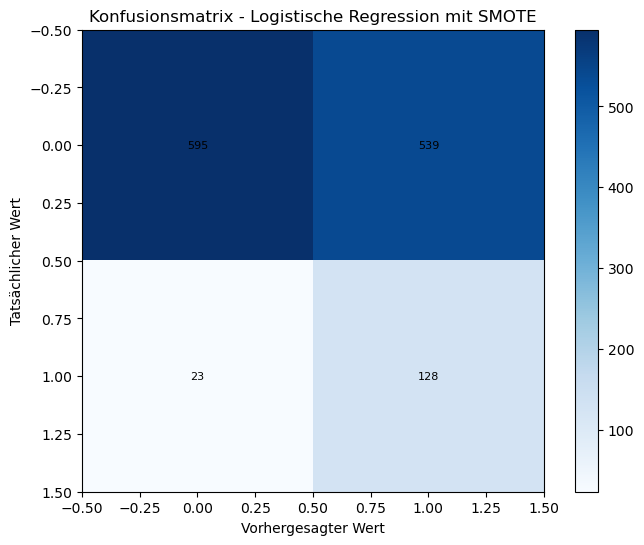

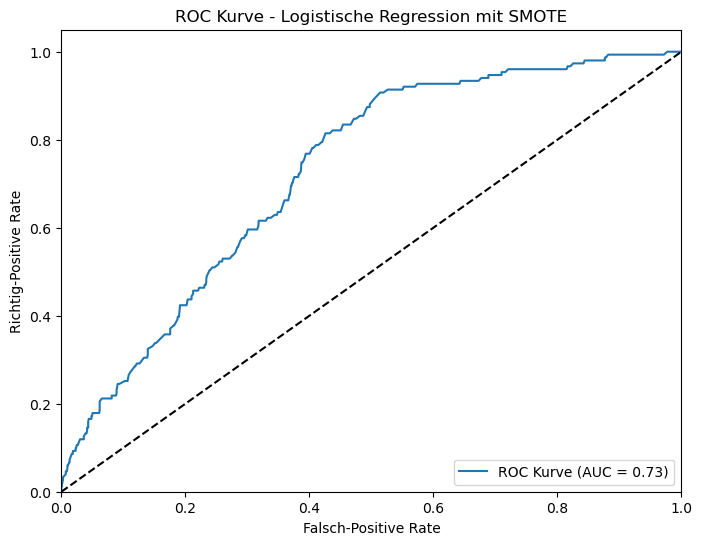


Random Forest mit Klassengewichtung
Beste Parameter: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}

Ergebnisse für Random Forest mit Klassengewichtung:
Konfusionsmatrix:
[[844 290]
 [ 80  71]]

Klassifikationsbericht:
              precision    recall  f1-score   support

       False       0.91      0.74      0.82      1134
        True       0.20      0.47      0.28       151

    accuracy                           0.71      1285
   macro avg       0.56      0.61      0.55      1285
weighted avg       0.83      0.71      0.76      1285

AUC-ROC Score: 0.6542


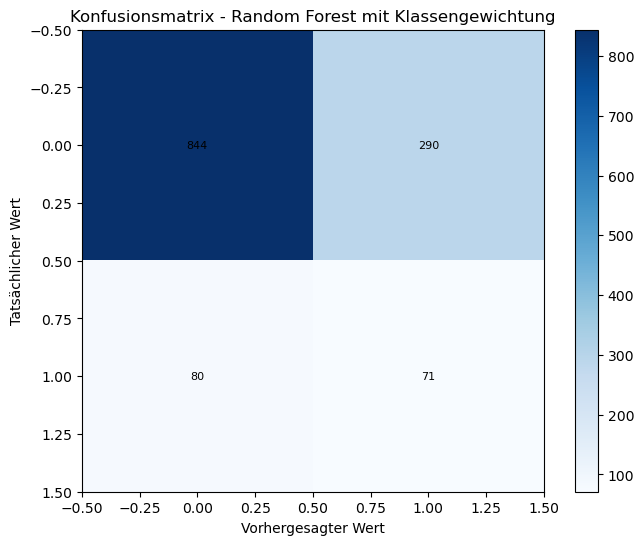

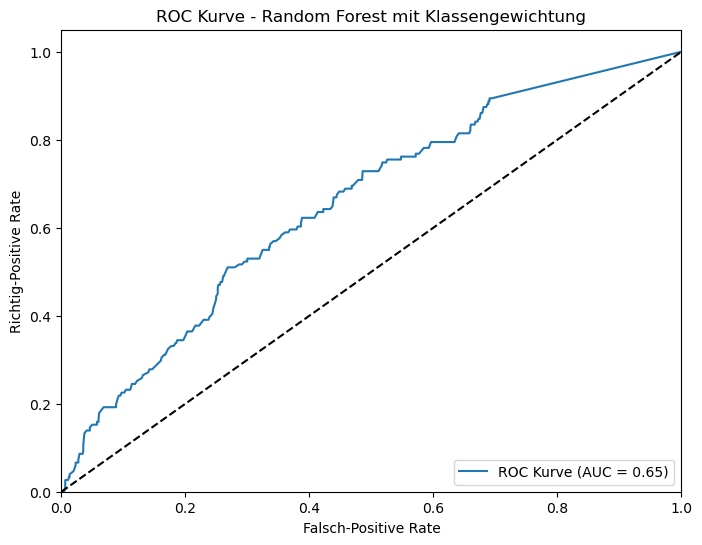


XGBoost mit ADASYN und verbesserter Kalibrierung
Beste Parameter: {'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 100, 'xgb__subsample': 0.9}

Ergebnisse für XGBoost mit ADASYN und verbesserter Kalibrierung:
Konfusionsmatrix:
[[1131    3]
 [ 148    3]]

Klassifikationsbericht:
              precision    recall  f1-score   support

       False       0.88      1.00      0.94      1134
        True       0.50      0.02      0.04       151

    accuracy                           0.88      1285
   macro avg       0.69      0.51      0.49      1285
weighted avg       0.84      0.88      0.83      1285

AUC-ROC Score: 0.7018


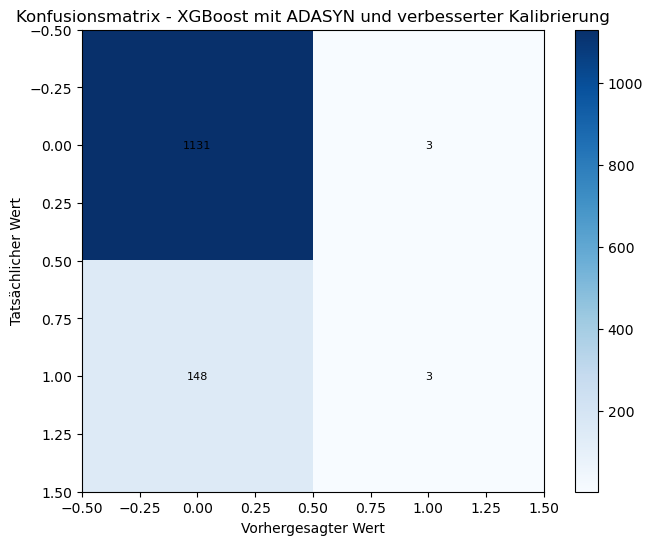

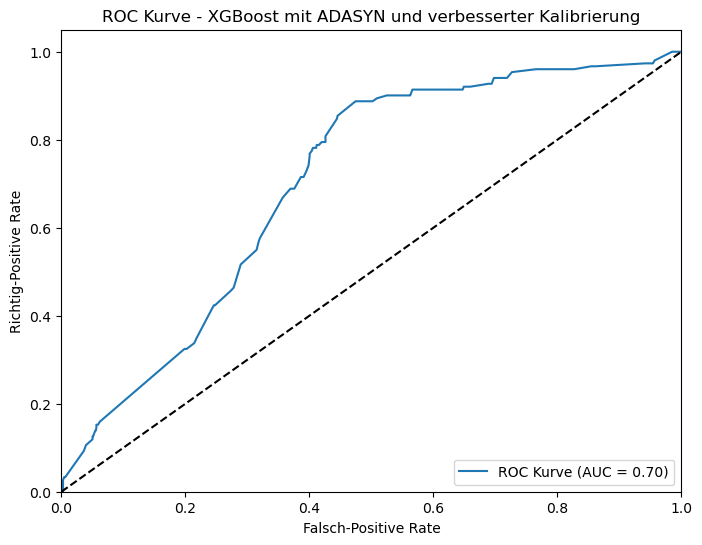

Beste Schwelle für XGBoost: 0.10

Ergebnisse für XGBoost mit angepasstem Schwellenwert:
Konfusionsmatrix:
[[629 505]
 [ 22 129]]

Klassifikationsbericht:
              precision    recall  f1-score   support

       False       0.97      0.55      0.70      1134
        True       0.20      0.85      0.33       151

    accuracy                           0.59      1285
   macro avg       0.58      0.70      0.52      1285
weighted avg       0.88      0.59      0.66      1285

AUC-ROC Score: 0.7045


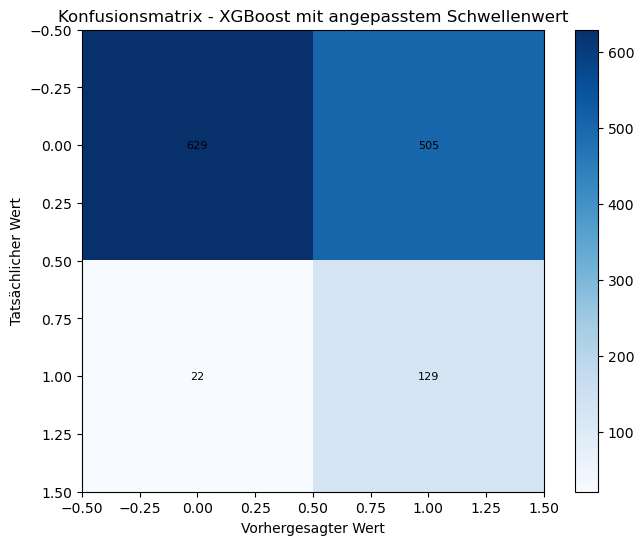

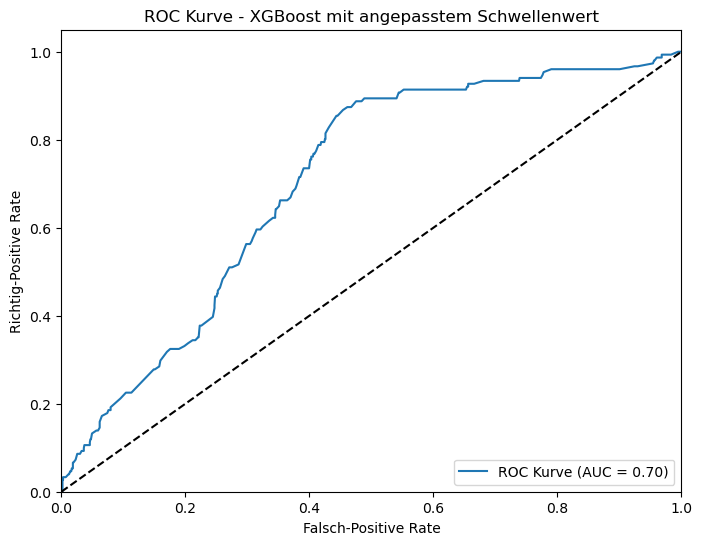

Beste Schwelle für Random Forest: 0.13

Ergebnisse für Random Forest mit angepasstem Schwellenwert:
Konfusionsmatrix:
[[737 397]
 [ 63  88]]

Klassifikationsbericht:
              precision    recall  f1-score   support

       False       0.92      0.65      0.76      1134
        True       0.18      0.58      0.28       151

    accuracy                           0.64      1285
   macro avg       0.55      0.62      0.52      1285
weighted avg       0.83      0.64      0.71      1285

AUC-ROC Score: 0.6595


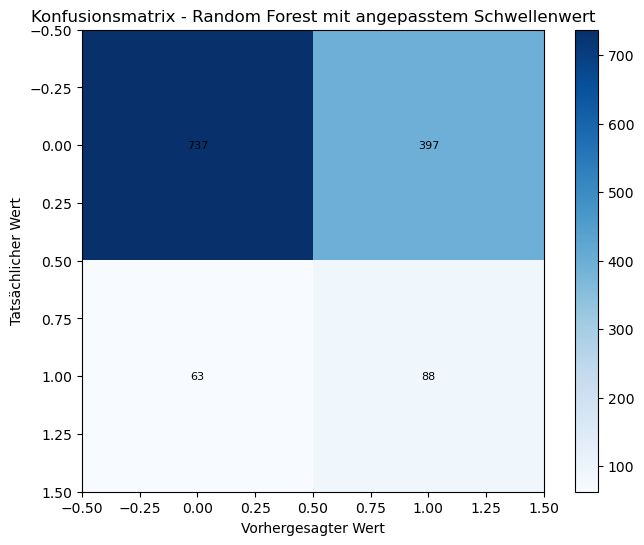

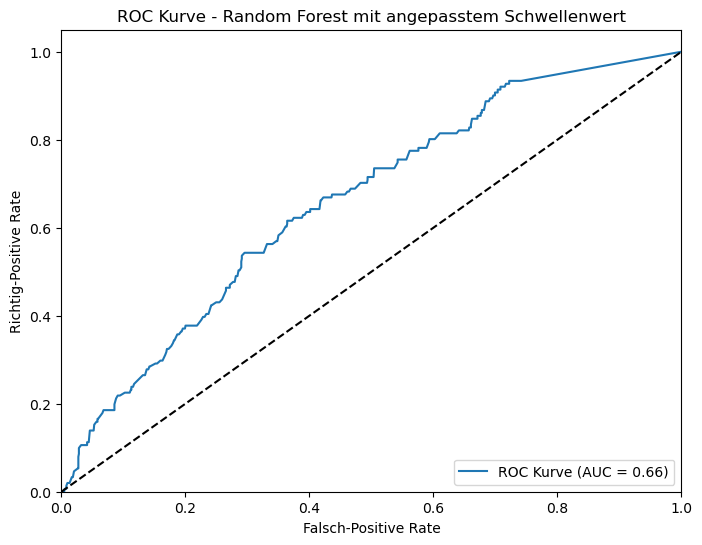

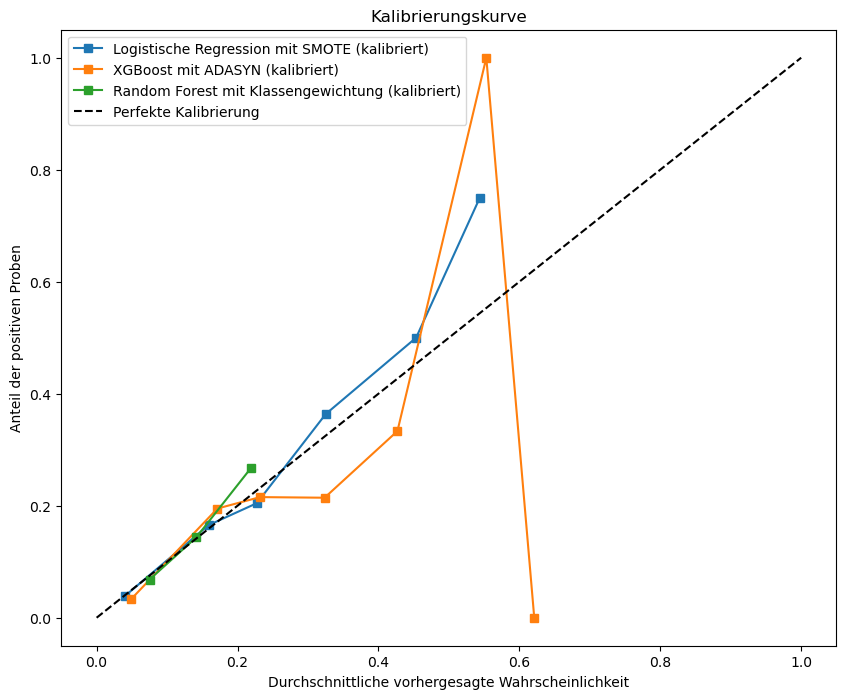

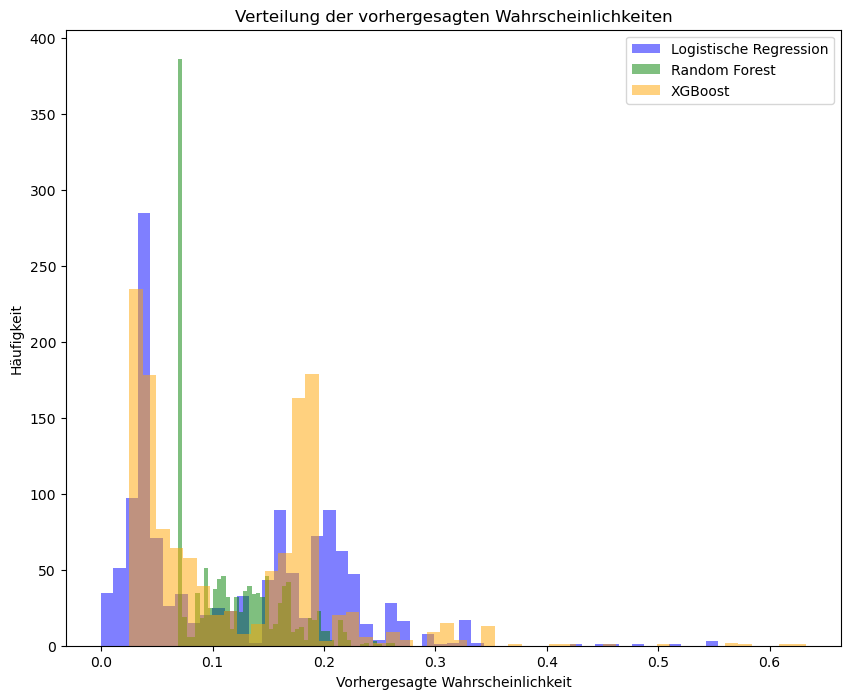

In [310]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Kombinieren der ausgewählten Features aus beiden Zielvariablen
combined_features = list(set(target_correlations['Mahnverfahren_ja']).union(set(target_correlations['Mahnverfahren_nein'])))

# Erstellen des Feature-Sets und der Zielvariable
X = df_encoded[combined_features]
y = df_encoded['Mahnverfahren_ja']

# Daten in Trainings- und Testsets aufteilen mit Stratifizierung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def auswerten_und_visualisieren(modell, X_train, X_test, y_train, y_test, modell_name, threshold=0.5):
    # Modell trainieren
    modell.fit(X_train, y_train)

    # Vorhersagen
    y_pred_proba = modell.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Konfusionsmatrix
    cm = confusion_matrix(y_test, y_pred)

    # Klassifikationsbericht
    bericht = classification_report(y_test, y_pred)

    # AUC-ROC Score
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    print(f"\nErgebnisse für {modell_name}:")
    print("Konfusionsmatrix:")
    print(cm)
    print("\nKlassifikationsbericht:")
    print(bericht)
    print(f"AUC-ROC Score: {auc_roc:.4f}")

    # Konfusionsmatrix visualisieren
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap="Blues", interpolation="nearest")
    plt.colorbar()
    plt.title(f'Konfusionsmatrix - {modell_name}')
    plt.ylabel('Tatsächlicher Wert')
    plt.xlabel('Vorhergesagter Wert')
# Anzeigen der Anzahl der Stichproben in jeder Zelle
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha="center", va="center", fontsize=8)

    plt.show()

    # ROC-Kurve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Kurve (AUC = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Falsch-Positive Rate')
    plt.ylabel('Richtig-Positive Rate')
    plt.title(f'ROC Kurve - {modell_name}')
    plt.legend(loc="lower right")
    plt.show()

    return y_pred_proba


# Logistische Regression mit SMOTE
print("Logistische Regression mit SMOTE")
pipeline_lr = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
param_grid_lr = {'lr__C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr_modell = GridSearchCV(pipeline_lr, param_grid_lr, cv=StratifiedKFold(n_splits=5), scoring='f1_weighted')
lr_modell.fit(X_train, y_train)
print(f"Beste Parameter: {lr_modell.best_params_}")
lr_proba = auswerten_und_visualisieren(lr_modell.best_estimator_, X_train, X_test, y_train, y_test, "Logistische Regression mit SMOTE")

# Kalibrieren des logistischen Regressionsmodells mit Isotonic Regression
lr_calibrated = CalibratedClassifierCV(lr_modell.best_estimator_, method='isotonic', cv=5)
lr_calibrated.fit(X_train, y_train)
lr_cal_proba = lr_calibrated.predict_proba(X_test)[:, 1]

# Random Forest mit Klassengewichtung
print("\nRandom Forest mit Klassengewichtung")
rf_modell = RandomForestClassifier(class_weight='balanced', random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}
rf_modell = GridSearchCV(rf_modell, param_grid_rf, cv=StratifiedKFold(n_splits=5), scoring='f1_weighted')
rf_modell.fit(X_train, y_train)
print(f"Beste Parameter: {rf_modell.best_params_}")
rf_proba = auswerten_und_visualisieren(rf_modell.best_estimator_, X_train, X_test, y_train, y_test, "Random Forest mit Klassengewichtung")

# Kalibrieren des Random Forest Modells mit Platt Scaling
rf_calibrated = CalibratedClassifierCV(rf_modell.best_estimator_, method='sigmoid', cv=5)
rf_calibrated.fit(X_train, y_train)
rf_cal_proba = rf_calibrated.predict_proba(X_test)[:, 1]

# Benutzerdefinierte Verlustfunktion für XGBoost
def custom_obj(predt, dtrain):
    y = dtrain.get_label()
    predt = 1.0 / (1.0 + np.exp(-predt))
    grad = predt - y
    hess = predt * (1.0 - predt)
    return grad, hess

# XGBoost mit ADASYN und verbesserter Kalibrierung
print("\nXGBoost mit ADASYN und verbesserter Kalibrierung")
pipeline_xgb = Pipeline([
    ('adasyn', ADASYN(random_state=42, sampling_strategy=0.7)),
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

param_grid_xgb = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 4, 5],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.8, 0.9, 1.0],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__gamma': [0, 0.1, 0.2]
}

xgb_modell = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=StratifiedKFold(n_splits=5), scoring='f1_weighted')
xgb_modell.fit(X_train, y_train)
print(f"Beste Parameter: {xgb_modell.best_params_}")

# Kalibrierung nach der Suche der besten Parameter
xgb_calibrated = CalibratedClassifierCV(xgb_modell.best_estimator_, method='isotonic', cv=5)
xgb_calibrated.fit(X_train, y_train)

xgb_proba = auswerten_und_visualisieren(xgb_calibrated, X_train, X_test, y_train, y_test, "XGBoost mit ADASYN und verbesserter Kalibrierung")

# Ensemble-Kalibrierung für XGBoost
xgb_isotonic = CalibratedClassifierCV(xgb_calibrated, method='isotonic', cv=10)
xgb_sigmoid = CalibratedClassifierCV(xgb_calibrated, method='sigmoid', cv=10)

xgb_ensemble = VotingClassifier(
    estimators=[('isotonic', xgb_isotonic), ('sigmoid', xgb_sigmoid)],
    voting='soft'
)

xgb_ensemble.fit(X_train, y_train)
xgb_cal_proba = xgb_ensemble.predict_proba(X_test)[:, 1] 

# Entscheidungsschwellenwert anpassen
def beste_schwelle(y_true, y_pred_proba):
    thresholds = np.arange(0.0, 1.0, 0.01)
    f1_scores = [f1_score(y_true, (y_pred_proba >= t).astype(int)) for t in thresholds]
    beste_schwelle = thresholds[np.argmax(f1_scores)]
    return beste_schwelle

# Anpassung des Schwellenwerts für XGBoost
beste_schwelle_xgb = beste_schwelle(y_test, xgb_cal_proba)
print(f"Beste Schwelle für XGBoost: {beste_schwelle_xgb:.2f}")
_ = auswerten_und_visualisieren(xgb_ensemble, X_train, X_test, y_train, y_test, "XGBoost mit angepasstem Schwellenwert", threshold=beste_schwelle_xgb)

# Anpassung des Schwellenwerts für Random Forest
beste_schwelle_rf = beste_schwelle(y_test, rf_cal_proba)
print(f"Beste Schwelle für Random Forest: {beste_schwelle_rf:.2f}")
_ = auswerten_und_visualisieren(rf_calibrated, X_train, X_test, y_train, y_test, "Random Forest mit angepasstem Schwellenwert", threshold=beste_schwelle_rf)

# Kalibrierungskurven visualisieren
plt.figure(figsize=(10, 8))
for clf, name in [(lr_calibrated, 'Logistische Regression mit SMOTE (kalibriert)'),
                  (xgb_ensemble, 'XGBoost mit ADASYN (kalibriert)'),
                  (rf_calibrated, 'Random Forest mit Klassengewichtung (kalibriert)')]:
    prob_pos = clf.predict_proba(X_test)[:, 1]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label=name)

plt.plot([0, 1], [0, 1], "k--", label='Perfekte Kalibrierung')
plt.ylabel('Anteil der positiven Proben')
plt.xlabel('Durchschnittliche vorhergesagte Wahrscheinlichkeit')
plt.title('Kalibrierungskurve')
plt.legend(loc="best")
plt.show()

# Verteilung der vorhergesagten Wahrscheinlichkeiten visualisieren
plt.figure(figsize=(10, 8))
plt.hist(lr_cal_proba, bins=50, alpha=0.5, label='Logistische Regression', color='blue')
plt.hist(rf_cal_proba, bins=50, alpha=0.5, label='Random Forest', color='green')
plt.hist(xgb_cal_proba, bins=50, alpha=0.5, label='XGBoost', color='orange')
plt.title('Verteilung der vorhergesagten Wahrscheinlichkeiten')
plt.xlabel('Vorhergesagte Wahrscheinlichkeit')
plt.ylabel('Häufigkeit')
plt.legend(loc='best')
plt.show()

### Interpretation der Ergebnisse - logistische Regressionsmodell mit SMOTE

#### Konfusionsmatrix

Die Konfusionsmatrix für das logistische Regressionsmodell mit SMOTE ist wie folgt:
Aus der Konfusionsmatrix können wir Folgendes entnehmen:

- Das Modell identifiziert korrekt 595 von 1134 "False"-Instanzen.
- Es klassifiziert 539 "False"-Instanzen fälschlicherweise als "True".
- Es identifiziert korrekt 128 von 151 "True"-Instanzen.
- Es klassifiziert 23 "True"-Instanzen fälschlicherweise als "False".

#### Klassifikationsbericht

Der Klassifikationsbericht liefert detaillierte Metriken:

- **Precision für "False"**: 0.96 (der Anteil der vorhergesagten "False", die tatsächlich "False" sind)
- **Recall für "False"**: 0.52 (der Anteil der tatsächlichen "False", die korrekt vorhergesagt werden)
- **F1-Score für "False"**: 0.68 (das harmonische Mittel aus Precision und Recall)
- **Precision für "True"**: 0.19 (der Anteil der vorhergesagten "True", die tatsächlich "True" sind)
- **Recall für "True"**: 0.85 (der Anteil der tatsächlichen "True", die korrekt vorhergesagt werden)
- **F1-Score für "True"**: 0.31 (das harmonische Mittel aus Precision und Recall)
- **Gesamtgenauigkeit**: 0.56 (der Anteil der insgesamt korrekten Vorhersagen)
- **Macro Avg**: 0.58 (Precision), 0.69 (Recall), 0.50 (F1-Score)
- **Weighted Avg**: 0.87 (Precision), 0.56 (Recall), 0.64 (F1-Score)

#### ROC-Kurve und AUC-Wert

Die ROC-Kurve illustriert das Verhältnis zwischen der True Positive Rate (Recall) und der False Positive Rate (1-Spezifität). Der AUC-Wert von 0.73 zeigt, dass das Modell ein gutes Trennvermögen besitzt, d.h. es ist besser als zufälliges Raten, aber nicht perfekt. AUC-Werte näher an 1.0 deuten auf eine bessere Leistung hin.

-----



### Interpretation der Ergebnisse - Random Forest mit Klassengewichtung

#### Konfusionsmatrix

Aus der Konfusionsmatrix können wir Folgendes entnehmen:

- Das Modell identifiziert korrekt 844 von 1134 "False"-Instanzen.
- Es klassifiziert 290 "False"-Instanzen fälschlicherweise als "True".
- Es identifiziert korrekt 71 von 151 "True"-Instanzen.
- Es klassifiziert 80 "True"-Instanzen fälschlicherweise als "False".

#### Klassifikationsbericht

Der Klassifikationsbericht liefert detaillierte Metriken:

- **Precision für "False"**: 0.91 (der Anteil der vorhergesagten "False", die tatsächlich "False" sind)
- **Recall für "False"**: 0.74 (der Anteil der tatsächlichen "False", die korrekt vorhergesagt werden)
- **F1-Score für "False"**: 0.82 (das harmonische Mittel aus Precision und Recall)
- **Precision für "True"**: 0.20 (der Anteil der vorhergesagten "True", die tatsächlich "True" sind)
- **Recall für "True"**: 0.47 (der Anteil der tatsächlichen "True", die korrekt vorhergesagt werden)
- **F1-Score für "True"**: 0.28 (das harmonische Mittel aus Precision und Recall)
- **Gesamtgenauigkeit**: 0.71 (der Anteil der insgesamt korrekten Vorhersagen)
- **Macro Avg**: 0.56 (Precision), 0.61 (Recall), 0.55 (F1-Score)
- **Weighted Avg**: 0.83 (Precision), 0.71 (Recall), 0.76 (F1-Score)

#### AUC-ROC-Wert

Der AUC-ROC-Wert beträgt 0.6542, was darauf hinweist, dass das Modell eine mäßige Trennfähigkeit besitzt. Ein höherer AUC-Wert würde auf eine bessere Leistung hinweisen.

----


### Interpretation der Ergebnisse - XGBoost mit ADASYN und verbesserter Kalibrierung

- **True Negatives (TN)**: 1131 (korrekt als "False" vorhergesagt)
- **False Positives (FP)**: 3 (fälschlicherweise als "True" vorhergesagt)
- **False Negatives (FN)**: 148 (fälschlicherweise als "False" vorhergesagt)
- **True Positives (TP)**: 3 (korrekt als "True" vorhergesagt)

Aus der Konfusionsmatrix können wir Folgendes entnehmen:

- Das Modell identifiziert korrekt 1131 von 1134 "False"-Instanzen.
- Es klassifiziert nur 3 "False"-Instanzen fälschlicherweise als "True".
- Es identifiziert korrekt 3 von 151 "True"-Instanzen.
- Es klassifiziert 148 "True"-Instanzen fälschlicherweise als "False".

#### Klassifikationsbericht

Der Klassifikationsbericht liefert detaillierte Metriken:

- **Precision für "False"**: 0.88 (der Anteil der vorhergesagten "False", die tatsächlich "False" sind)
- **Recall für "False"**: 1.00 (der Anteil der tatsächlichen "False", die korrekt vorhergesagt werden)
- **F1-Score für "False"**: 0.94 (das harmonische Mittel aus Precision und Recall)
- **Precision für "True"**: 0.50 (der Anteil der vorhergesagten "True", die tatsächlich "True" sind)
- **Recall für "True"**: 0.02 (der Anteil der tatsächlichen "True", die korrekt vorhergesagt werden)
- **F1-Score für "True"**: 0.04 (das harmonische Mittel aus Precision und Recall)
- **Gesamtgenauigkeit**: 0.88 (der Anteil der insgesamt korrekten Vorhersagen)
- **Macro Avg**: 0.69 (Precision), 0.51 (Recall), 0.49 (F1-Score)
- **Weighted Avg**: 0.84 (Precision), 0.88 (Recall), 0.83 (F1-Score)

#### AUC-ROC-Wert

Der AUC-ROC-Wert beträgt 0.7018, was darauf hinweist, dass das Modell eine bessere Trennfähigkeit besitzt als das Zufallsmodell und eine Verbesserung gegenüber dem Random Forest Modell zeigt.


## Updating domain Wissen 
### Problem: 
 **Der AUC-ROC-Wert zeigte eine gute Trennfähigkeit des Modells, aber die extrem niedrige Recall für die "True"-Klasse war hier  ein Bereich, der verbessert werden musste. das Modell hatte Schwierigkeiten bei der korrekten Klassifizierung der "True"-Klasse, was auf das stark unausgewogene Verhältnis der Klassen im Datensatz zurückzuführen sein könnte.**
 
 -----

### Lösungsansätze:


Um das Regressionsmodell und XGBOOST zu verbessern, haben wir mögliche Ansätze untersucht, um bessere Ergebnisse zu erzielen. Unsere Ansätze waren die folgenden:

 - Random Forest mit Klassengewichtung hinzugefügt und optimiert
 - Threshold Adjustment: zweitens  wollten wir den Entscheidungsschwellenwert anpassen, um den F1-Score der positiven Klasse zu verbessern.Der optimale Schwellenwert wird basierend auf dem F1-Score angepasst, um die Balance zwischen Präzision und Recall zu verbessern.
 - Kaliebrierung
 ### Ergebniss :
 für das Regressionsmodell waren diese Änderungen sinnvoll und wir könnte eine kleine Verbesserung erzielen ,was auch anhand der Visualisierung der Kaliebrierungen festzustellen ist.für XGBOOST war das immerhin der Gegenfall  wir konnten folgendes beobachten :
 - Unterschätzung der Wahrscheinlichkeiten im niedrigen bis mittleren Bereich;
 - Starke Überschätzung bei hohen Wahrschenlichkeiten;
 - Erratisches Verhalten mit abrupten Sprüngen, vor allem bei hohen Wahrscheinlichkeiten
 

 **Unter Betrachtung dieser Mangel beim XGBOOST Modell haben wir in einem zweiten Zeitpunkt versucht ,das modell besser zu kalibrieren ,damit bessere Ergebnisse einfacher erzielt werden können .**

 dieser zweite Versuch war wie folgt strukturiert :
- Anpassung der Hyperparameter:

Durch Hinzufügen von min_child_weight und gamma wollten wir  das Modell besser regulieren.

- Verwendung eines Modellsatzes für die Kalibrierung:

Einsatz eines VotingClassifier (kombiniert zwei Kalibrierungsmethoden : in unserem FALL isotonisch und sigmoid), was die Stabilität der Kalibrierung verbessern konnte.
- Anpassung der Entscheidungsschwelle:

Die Funktion beste_schwelle haben wir noch besser eingestellt ,um  den Schwellenwert auf der Grundlage des F1-Scores zu optimieren , wodurch ein besseres Gleichgewicht zwischen Genauigkeit und Erinnerung erreicht werden sollte.
### Ergebniss : 
wie bei der Visualisierung am endes des zweiten codes zu sehen ist ,hat unseren zweiten Versucht geklappt und das Modell ist nun besser kalibriert und kann etwas konkreter die Wahrscheinlichkeiten vorhersagen.




XGBoost mit ADASYN und verbesserter Kalibrierung
Beste Parameter: {'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 100, 'xgb__subsample': 0.9}

Ergebnisse für XGBoost mit ADASYN und verbesserter Kalibrierung:
Konfusionsmatrix:
[[1131    3]
 [ 148    3]]

Klassifikationsbericht:
              precision    recall  f1-score   support

       False       0.88      1.00      0.94      1134
        True       0.50      0.02      0.04       151

    accuracy                           0.88      1285
   macro avg       0.69      0.51      0.49      1285
weighted avg       0.84      0.88      0.83      1285

AUC-ROC Score: 0.7018


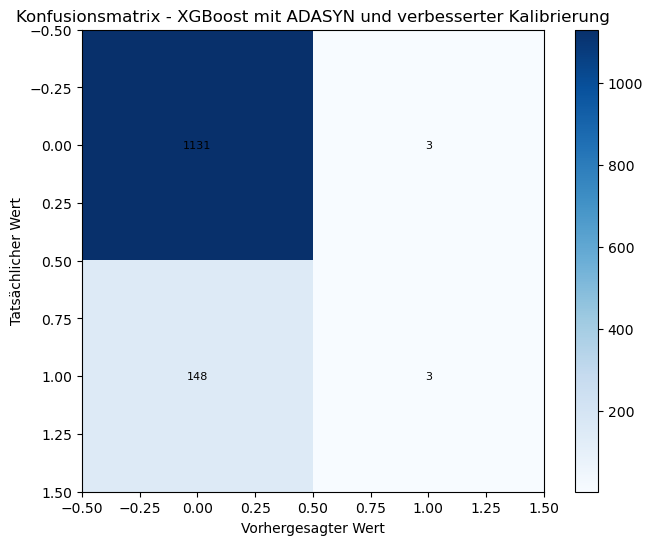

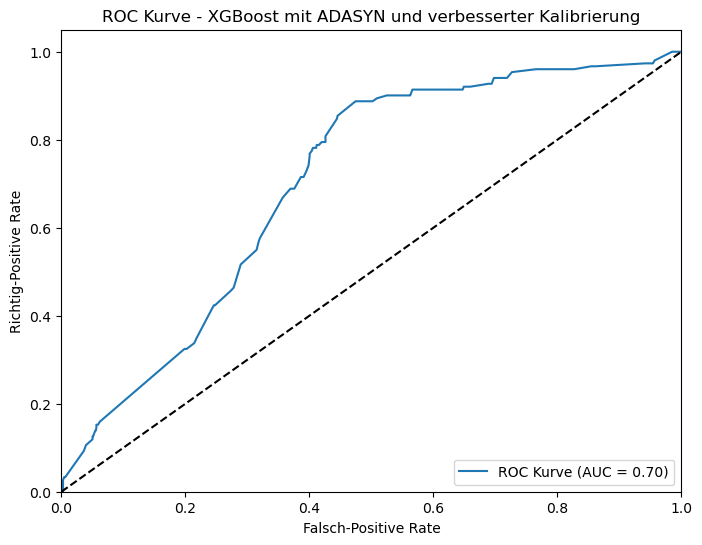

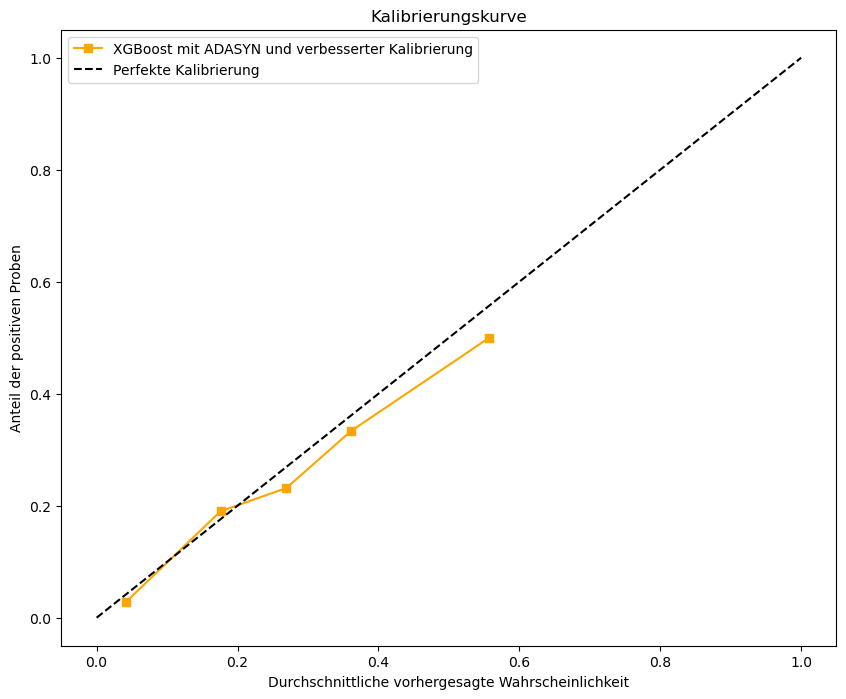

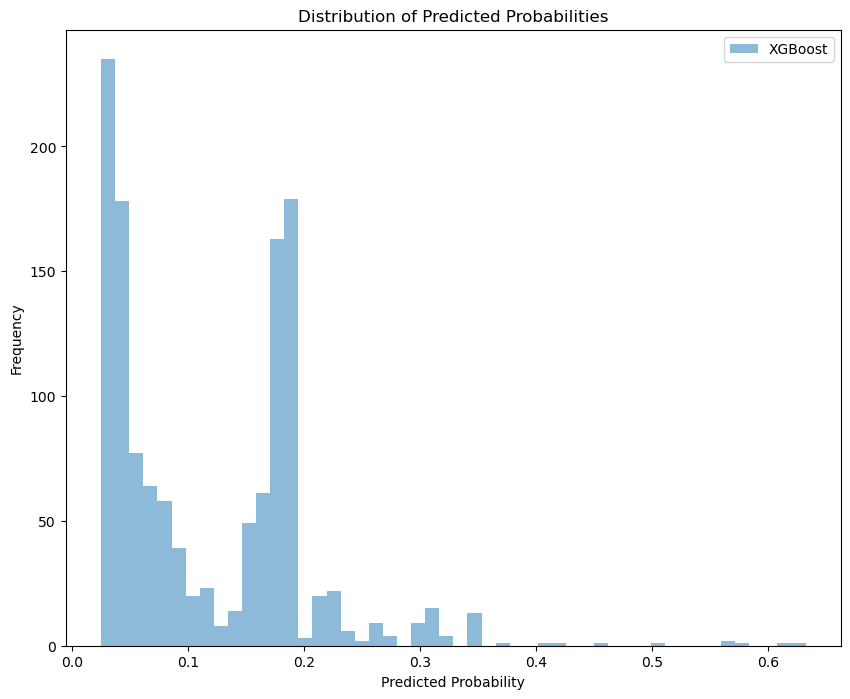

In [311]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Kombinieren der ausgewählten Features aus beiden Zielvariablen
combined_features = list(set(target_correlations['Mahnverfahren_ja']).union(set(target_correlations['Mahnverfahren_nein'])))

# Erstellen des Feature-Sets und der Zielvariable
X = df_encoded[combined_features]
y = df_encoded['Mahnverfahren_ja']

# Daten in Trainings- und Testsets aufteilen mit Stratifizierung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def auswerten_und_visualisieren(modell, X_train, X_test, y_train, y_test, modell_name, threshold=0.5):
    # Modell trainieren
    modell.fit(X_train, y_train)

    # Vorhersagen
    y_pred_proba = modell.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Konfusionsmatrix
    cm = confusion_matrix(y_test, y_pred)

    # Klassifikationsbericht
    bericht = classification_report(y_test, y_pred)

    # AUC-ROC Score
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    print(f"\nErgebnisse für {modell_name}:")
    print("Konfusionsmatrix:")
    print(cm)
    print("\nKlassifikationsbericht:")
    print(bericht)
    print(f"AUC-ROC Score: {auc_roc:.4f}")

    # Konfusionsmatrix visualisieren
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap="Blues", interpolation="nearest")
    plt.colorbar()
    plt.title(f'Konfusionsmatrix - {modell_name}')
    plt.ylabel('Tatsächlicher Wert')
    plt.xlabel('Vorhergesagter Wert')

    # Anzeigen der Anzahl der Stichproben in jeder Zelle
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha="center", va="center", fontsize=8)

    plt.show()

    # ROC-Kurve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Kurve (AUC = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Falsch-Positive Rate')
    plt.ylabel('Richtig-Positive Rate')
    plt.title(f'ROC Kurve - {modell_name}')
    plt.legend(loc="lower right")
    plt.show()

    return y_pred_proba

# XGBoost mit ADASYN und verbesserter Kalibrierung
print("\nXGBoost mit ADASYN und verbesserter Kalibrierung")
pipeline_xgb = Pipeline([
    ('adasyn', ADASYN(random_state=42, sampling_strategy=0.7)),
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])
param_grid_xgb = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 4, 5],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.8, 0.9, 1.0],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__gamma': [0, 0.1, 0.2]
}
xgb_modell = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=StratifiedKFold(n_splits=5), scoring='f1_weighted')
xgb_modell.fit(X_train, y_train)
print(f"Beste Parameter: {xgb_modell.best_params_}")

# Kalibrierung nach der Suche der besten Parameter
xgb_calibrated = CalibratedClassifierCV(xgb_modell.best_estimator_, method='isotonic', cv=5)
xgb_calibrated.fit(X_train, y_train)
xgb_proba = auswerten_und_visualisieren(xgb_calibrated, X_train, X_test, y_train, y_test, "XGBoost mit ADASYN und verbesserter Kalibrierung")

# Kalibrierungskurven visualisieren
plt.figure(figsize=(10, 8))
for clf, name in [(xgb_calibrated, 'XGBoost mit ADASYN und verbesserter Kalibrierung')]:
    prob_pos = clf.predict_proba(X_test)[:, 1]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label=name, color='orange')

plt.plot([0, 1], [0, 1], "k--", label='Perfekte Kalibrierung')
plt.ylabel('Anteil der positiven Proben')
plt.xlabel('Durchschnittliche vorhergesagte Wahrscheinlichkeit')
plt.title('Kalibrierungskurve')
plt.legend(loc="best")
plt.show()

# Verteilung der vorhergesagten Wahrscheinlichkeiten visualisieren
plt.figure(figsize=(10, 8))
plt.hist(xgb_cal_proba, bins=50, alpha=0.5, label='XGBoost')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.show()


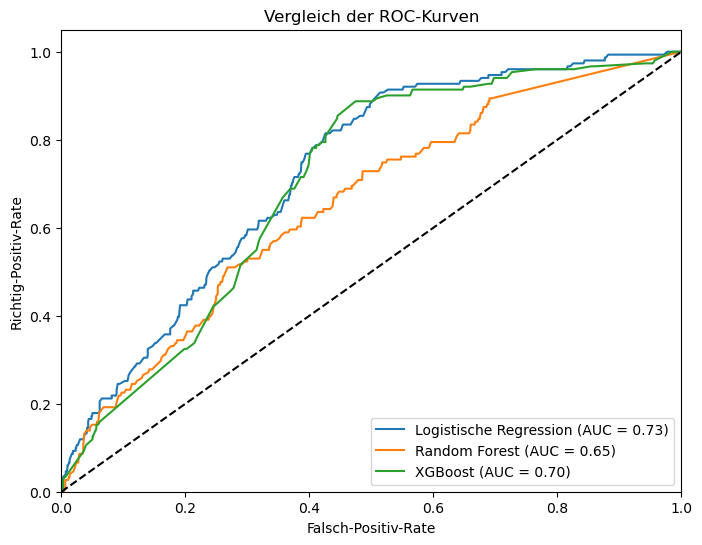


Vergleich der Modelle:
Logistische Regression AUC-ROC: 0.726076596937524
Random Forest AUC-ROC: 0.6542158683439036
XGBoost AUC-ROC: 0.7018349159629513


In [312]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Vergleich der ROC-Kurven
plt.figure(figsize=(8, 6))

# Berechnung der ROC-Kurven für die logistische Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_proba)
plt.plot(fpr_lr, tpr_lr, label=f'Logistische Regression (AUC = {roc_auc_score(y_test, lr_proba):.2f})')

# Berechnung der ROC-Kurven für Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_proba):.2f})')

# Berechnung der ROC-Kurven für XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, xgb_proba):.2f})')

# Referenzlinie hinzufügen
plt.plot([0, 1], [0, 1], 'k--')

# Achsen und Grafik konfigurieren
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsch-Positiv-Rate')
plt.ylabel('Richtig-Positiv-Rate')
plt.title('Vergleich der ROC-Kurven')
plt.legend(loc="lower right")
plt.show()

# Anzeige der AUC-ROC Scores zum Vergleich
print("\nVergleich der Modelle:")
print("Logistische Regression AUC-ROC:", roc_auc_score(y_test, lr_proba))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, rf_proba))
print("XGBoost AUC-ROC:", roc_auc_score(y_test, xgb_proba))


#### Vergleich der Modelle anhand der ROC-Kurven

1. **Logistische Regression**:
   - zeigt eine gute Trennschärfe zwischen den Klassen und hat die höchste AUC-ROC unter den drei verglichenen Modellen, was darauf hinweist, dass es die beste Gesamtleistung hat.
   - Die ROC-Kurve der logistischen Regression verläuft am weitesten oben links im Diagramm, was auf eine bessere Klassifikationsleistung über verschiedene Schwellenwerte hinweist.

2. **Random Forest**:
   - Diese AUC-ROC ist niedriger als die der logistischen Regression und XGBoost deswegen kann das  Modell   die Klassen nicht so gut trennen.
   - Die ROC-Kurve des Random Forest verläuft weiter rechts und unten im Diagramm im Vergleich zu den anderen beiden Modellen, was eine geringere Richtig-Positive-Rate bei einer gegebenen Falsch-Positive-Rate bedeutet.

3. **XGBoost**:
   - AUC-ROC liegt zwischen der logistischen Regression und des Random Forest. also ist  XGBoost besser  als Random Forest, aber nicht so gut wie die logistische Regression.
